## **CAPSTONE PROJECT 2 : Supermarket Customers**

### **Latar Belakang**

Sebuah perusahaan supermarket sedang berupaya untuk meningkatkan penjualan dan profitabilitas. Untuk mencapai tujuan tersebut, perusahaan mengumpulkan dan menganalisis data customer yang mencakup berbagai aspek seperti status pelanggan, jumlah pengeluaran pada produk tertentu, partisipasi dalam campaign promosi, serta informasi lainnya. Data ini memperlihatkan adanya perbedaan signifikan dalam perilaku customer, dimana beberapa customer aktif bertransaksi dan memberikan kontribusi besar terhadap total penjualan, sementara customer lainnya cenderung kurang aktif. Memahami perbedaan ini akan membuat strategi yang lebih efektif untuk mengoptimalkan penjualan dan meningkatkan loyalitas customer.

### **Pernyataan Masalah**

Perusahaan ingin mengetahui customer dengan indikasi dan segmentasi apa yang dapat menaikkan sales perusahaan. Informasi ini akan membantu perusahaan untuk:

1. Mengidentifikasi faktor-faktor kunci yang mempengaruhi penjualan dan retensi customer.
2. Menganalisis segmentasi customer untuk menyesuaikan strategi pemasaran dengan lebih efektif.
3. Mengevaluasi efektivitas campaign untuk mengoptimalkan promosi di masa depan.
3. Melakukan usaha yang tepat untuk mempertahankan customer agar menjadi customer setia dan terus datang kembali ke supermarket.

Sebagai *Data Analyst*, masalah tersebut akan dijawab dengan pertanyaan berikut:

**Faktor apa saja yang dapat mempengaruhi sales perusahaan dan bagaimana cara meningkatkan sales tersebut?**

**Bagaimana perbedaan karakteristik pada setiap segmentasi customer dan apa usaha yang tepat untuk setiap segmentasi customer dapat menjadi customer setia?**


### **Data**

Untuk menjawab pertanyaan di atas, data yang sudah dikumpulkan akan dianalisis. Dataset dapat diakses [disini](https://drive.google.com/drive/folders/1dlpJfgvs8P_IyXqWB4WrNwk91fx0XAzU)

In [163]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
import statsmodels.api as sm
import scipy.stats as stats

Dataset ini berisi data customer dari sebuah supermarket. Dalam kumpulan data tersebut, setiap baris mewakili setiap customer yang pernah berbelanja pada supermarket tersebut, dan kolom-kolomnya meliputi:

1. ID                   : Pengidentifikasi unik customer
2. Year_Birth           : Tahun kelahiran customer
3. Education            : Tingkat pendidikan customer
4. Marital_Status       : Status pernikahan customer
5. Income               : Pendapatan tahunan rumah tangga customer
6. Kidhome              : Jumlah anak-anak dalam rumah tangga customer
7. Teenhome             : Jumlah remaja dalam rumah tangga customer
8. Dt_Customer          : Tanggal pendaftaran customer dengan perusahaan
9. Recency              : Jumlah hari sejak pembelian terakhir customer
10. Complain            : 1 jika customer mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak
11. MntWines            : Jumlah yang dihabiskan untuk anggur dalam 2 tahun terakhir
12. MntFruits           : Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir
13. MntMeatProducts     : Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
14. MntFishProducts     : Jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir
15. MntSweetProducts    : Jumlah yang dihabiskan untuk makanan manis dalam 2 tahun terakhir
16. MntGoldProds        : Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir
17. NumDealsPurchases   : Jumlah pembelian yang dilakukan dengan diskon
18. AcceptedCmp1        : 1 jika customer menerima tawaran pada kampanye pertama, 0 jika tidak
19. AcceptedCmp2        : 1 jika customer menerima tawaran pada kampanye kedua, 0 jika tidak
20. AcceptedCmp3        : 1 jika customer menerima tawaran pada kampanye ketiga, 0 jika tidak
21. AcceptedCmp4        : 1 jika customer menerima tawaran pada kampanye keempat, 0 jika tidak
22. AcceptedCmp5        : 1 jika customer menerima tawaran pada kampanye kelima, 0 jika tidak
23. Response            : 1 jika customer menerima tawaran pada kampanye terakhir, 0 jika tidak
24. NumWebPurchases     : Jumlah pembelian yang dilakukan melalui situs web perusahaan
25. NumCatalogPurchases : Jumlah pembelian yang dilakukan menggunakan katalog
26. NumStorePurchases   : Jumlah pembelian yang dilakukan langsung di toko
27. NumWebVisitsMonth   : Jumlah kunjungan ke situs web perusahaan dalam bulan terakhir

In [164]:
df = pd.read_csv('Supermarket Customers.csv',delimiter='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


### **Data Understanding and Cleaning**

Sebelum masuk ke dalam analisis data, data perlu dikenali lebih jauh dalam tahap *data understanding*. Dari proses ini, anomali-anomali yang terdapat di dalam dataset akan diketahui dan perlu ditangani dalam tahapan *data cleaning*. Setiap penanganan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, berikut informasi umum dari dataset Supermarket Customers:

In [165]:
print(f'Jumlah baris dan kolom pada dataset adalah {df.shape}\n')
df.info()

Jumlah baris dan kolom pada dataset adalah (2240, 29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [166]:
display(df.describe(),df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


Dalam data tersebut dan berdasarkan penjelasannya, masih terdapat beberapa tipe formatting kolom yang kurang sesuai. Sebelum dilanjutkan analisis, maka kolom berikut akan diubah formatting nya terlebih dahulu:

1. ID: int64/integer akan diubah menjadi object
2. Dt_Customer: object akan diubah menjadi datetime
3. AcceptedCmp3: int64/integer akan diubah menjadi object 
4. AcceptedCmp4: int64/integer akan diubah menjadi object 
5. AcceptedCmp5: int64/integer akan diubah menjadi object 
6. AcceptedCmp1: int64/integer akan diubah menjadi object
7. AcceptedCmp2: int64/integer akan diubah menjadi object  
8. Complain: int64/integer akan diubah menjadi object
9. Response: int64/integer akan diubah menjadi object 

Selain itu, terdapat 2 kolom lebih yaitu Z_CostContact dan Z_Revenue yang tidak terdefinisikan dalam Data Dictionary pada dataset. Agar tidak terdapat asumsi yang tidak pasti dan analisis tidak terganggu, maka kedua kolom tersebut akan dihapuskan.

In [167]:
# Kolom Year_Birth dan Dt_Customer

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format="%d-%m-%Y")

In [168]:
# Kolom ID, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Complain, Response

df['ID'] = df['ID'].astype('object')
df['AcceptedCmp1'] = df['AcceptedCmp1'].astype('object')
df['AcceptedCmp2'] = df['AcceptedCmp2'].astype('object')
df['AcceptedCmp3'] = df['AcceptedCmp3'].astype('object')
df['AcceptedCmp4'] = df['AcceptedCmp4'].astype('object')
df['AcceptedCmp5'] = df['AcceptedCmp5'].astype('object')
df['Complain'] = df['Complain'].astype('object')
df['Response'] = df['Response'].astype('object')

In [169]:
# Kolom Z_CostContact dan Z_Revenue

df.drop(columns='Z_CostContact', inplace=True)
df.drop(columns='Z_Revenue', inplace=True)

In [170]:
# Pengecekan kembali perubahan format
print(f'Jumlah baris dan kolom pada dataset adalah {df.shape}\n')
display(df.info(),df.describe(),df.describe(include='object'),df.head())

Jumlah baris dan kolom pada dataset adalah (2240, 27)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null 

None

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000
std,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645


,ID,Education,Marital_Status,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240
unique,2240,5,8,2,2,2,2,2,2,2
top,5524,Graduation,Married,0,0,0,0,0,0,0
freq,1,1127,864,2077,2073,2077,2096,2210,2219,1906


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [171]:
pd.set_option('display.max_colwidth',1)

# Data Unik pada setiap Kolom

list_item=[]
for col in df.columns:
    list_item.append([col, df[col].nunique(), df[col].unique()])

tabel_col_unique = pd.DataFrame(data=list_item, columns=['Column Name','Number of Unique','List Unique'])
tabel_col_unique

,Column Name,Number of Unique,List Unique
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-02-20 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2013-06-17 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2012-09-14 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-05-27 00:00:00, 2013-11-23 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06-2

Secara umum, setelah data sudah dirapihkan formatnya, dapat dilihat bahwa:

1. Dataset memiliki **2240 baris** dan **27 Kolom**
2. Kolom **ID**, yang merupakan identifikasi unik setiap customer sudah tidak ada yang sama setiap barisnya (**jumlah unique ID = 2240 sama dengan jumlah row = 2240**). 

    Selanjutnya akan dilakukan pengecekan kembali apakah terdapat data yang kosong dan data customer yang terduplikat walaupun memiliki ID yang berbeda. 
3. Kolom **Education** memiliki **5** data unique yaitu **Graduation, PhD, Master, Basic, 2n Cycle**. 

    Umumnya, education akan dibagi menjadi beberapa segmen seperti: SMA/High School, S1/Undergraduate, S2/Master, S3/PhD, dll. 
    
    Pada Kolom ini, terdapat 3 kategori yang tidak umum yaitu Graduation, Basic, 2n Cycle.  
4. Kolom **Marital Status** memiliki **8** data unique yaitu **Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO**. 

    Umumnya, martial status akan dibagi menjadi beberapa segmen seperti: Single, Married, Divorced, Widow. 
    
    Pada Kolom ini, terdapat 4 kolom yang tidak umum yaitu Together, Alone, Absurd, YOLO.



### Untuk kolom **Education**

Terdapat 3 kategori tidak umum akan dimasukkan ke dalam kategori lainnya yaitu Graduation, Basic, 2n Cycle.


Untuk 2n Cycle: Dalam bahasa inggris kemungkinan terdapat kesalahan penulisan "2n cycle" seharusnya "2nd cycle" dan menurut European Credit Transfer and Accumulation System (ECTS), 2nd Cycle atau second cycle sama dengan Master Degree atau S2 

2n Cycle akan diganti ke Master terlebih dahulu dan selebihnya akan dicek terlebih dahulu detail data nya

In [172]:
# Merubah education 2n Cycle menjadi Master

df.loc[df['Education']=='2n Cycle','Education']='Master'

In [173]:
jumlah_data_graduation = len(df[df['Education']=='Graduation'])
jumlah_data_basic = len(df[df['Education']=='Basic'])
print(f'Jumlah Data Education "Graduation" sebanyak {jumlah_data_graduation} dan {jumlah_data_graduation/df.shape[0]*100:.2f}% dari total data')
print(f'Jumlah Data Education "Basic" sebanyak {jumlah_data_basic} dan {jumlah_data_basic/df.shape[0]*100:.2f}% dari total data')

Jumlah Data Education "Graduation" sebanyak 1127 dan 50.31% dari total data
Jumlah Data Education "Basic" sebanyak 54 dan 2.41% dari total data


In [174]:
display(df[df['Education']=='Graduation'].head(),df[df['Education']=='Basic'].head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,3,7,6,0,0,0,0,0,0,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
11,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,...,0,3,8,0,0,0,0,0,0,0
105,8373,1979,Basic,Together,24594.0,1,0,2013-12-10,94,1,...,0,3,5,0,0,0,0,0,0,0
136,5342,1976,Basic,Divorced,9548.0,1,0,2012-08-08,31,0,...,0,3,8,0,0,0,0,0,0,0
184,2563,1961,Basic,Married,28249.0,0,0,2014-06-15,80,1,...,0,3,6,0,0,0,0,0,0,0
190,9733,1978,Basic,Together,24882.0,1,0,2012-09-09,52,1,...,1,2,6,1,0,0,0,0,0,0


Untuk membantu penggantian kategori Graduation dan Basic, akan dicoba dilihat hubungannya dengan umur dan income customer. 

In [175]:
# Penambahan kolom untuk umur customer

age= 2024-df['Year_Birth']
df.insert(2,'Customer_Age',age)

In [176]:
display(
    df[['Customer_Age','Education']][df['Education']=='Graduation'].groupby(by='Customer_Age').count().head(),
    df[['Customer_Age','Education']][df['Education']=='Basic'].groupby(by='Customer_Age').count().head(),
    df[['Education','Income']].groupby(by='Education').mean().rename(columns={'Income':'Income (Average)'}),
    df[['Education','Income']].groupby(by='Education').median().rename(columns={'Income':'Income (Median)'}),
)

,Education
Customer_Age,
29,3
30,3
31,5
32,6
33,7


,Education
Customer_Age,
28,1
32,4
33,1
34,2
35,2


,Income (Average)
Education,
Basic,20306.259259
Graduation,52720.373656
Master,51046.969912
PhD,56145.313929


,Income (Median)
Education,
Basic,20744.0
Graduation,52028.5
Master,49605.0
PhD,55212.0


In [177]:
percentage_difference = (df[df['Education'] == 'Graduation']['Income'].mean() / df[df['Education'] == 'Basic']['Income'].mean() - 1) * 100
percentage_difference

159.6262215645381

Sebelumnya, sudah terdapat 2 kategori yaitu PhD dan Master, dan umumnya masih ada kategori lainnya yang akan diasumsikan yaitu SMA / High School dan S1 / Bachelor.

Dari Detail data Graduation dan Basic, didapat umur minimal kedua kategori mirip yaitu 28 dan 29. Maka umur tidak bisa menjadi alasan yang kuat untuk menentukan kategori yang sebenarnya.

Sedangkan pada kedua data rata-rata dan median income, didapatkan bahwa income pada kategori graduation lebih tinggi dari kategori basic. Rata-rata income pada kategori graduation lebih tinggi 159.63% dari kategori basic. 

Secara umum, berdasarkan beberapa artikel oleh [detik finance](https://finance.detik.com/berita-ekonomi-bisnis/d-7005119/gaji-rata-rata-lulusan-sd-smp-sma-dan-s1-berapa-bedanya) dan [kompas](https://money.kompas.com/read/2020/02/25/112300526/gaji-rata-rata-pekerja-ri-berdasarkan-jenjang-pendidikan-sd-sampai-s1?page=all) , diketahui bahwa income lulusan S1 / Bachelor lebih tinggi dari kategori SMA / High School. Maka kedua kategori tersebut bisa diubah menjadi:
1. Basic menjadi High School
2. Graduation menjadi Bachelor


In [178]:
# Merubah education basic dan graduation

df.loc[df['Education']=='Basic','Education']='High School'
df.loc[df['Education']=='Graduation','Education']='Bachelor'

### Untuk kolom **Marital Status**

Terdapat 4 kategori tidak umum yaitu Together, Alone, Absurd dan YOLO. 

Untuk status Together, dalam bahasa inggris, together berarti bersama dimana kemungkinan besar kategori ini sama dengan Married. Data ini akan diubah terlebih dahulu ke married sebelum dilakukan perubahan status lainnya.

Untuk kategori status Alone, Absurd dan YOLO, akan dilihat terlebih dahulu banyaknya data dan detail data.

In [179]:
# Merubah status together menjadi married

df.loc[df['Marital_Status']=='Together','Marital_Status']='Married'

In [180]:
# Status Marital together sudah menjadi married
 
df['Marital_Status'].value_counts()

Marital_Status
Married     1444
Single      480 
Divorced    232 
Widow       77  
Alone       3   
Absurd      2   
YOLO        2   
Name: count, dtype: int64

In [181]:
total_status_diff = df['Marital_Status'].value_counts().loc[['YOLO', 'Absurd', 'Alone']].sum()
print(f'Jumlah Marital Status: Alone, Absurd dan YOLO adalah {total_status_diff} yaitu {total_status_diff/df.shape[0]*100:.2f}% dari keseluruhan data')

Jumlah Marital Status: Alone, Absurd dan YOLO adalah 7 yaitu 0.31% dari keseluruhan data


In [182]:
status_diff = pd.concat([df[df['Marital_Status']=='Alone'],df[df['Marital_Status']=='Absurd'],df[df['Marital_Status']=='YOLO']])
status_diff

,ID,Year_Birth,Customer_Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
131,433,1958,66,Master,Alone,61331.0,1,1,2013-03-10,42,...,1,6,8,0,0,0,0,0,0,0
138,7660,1973,51,PhD,Alone,35860.0,1,1,2014-05-19,37,...,1,2,5,1,0,0,0,0,0,1
153,92,1988,36,Bachelor,Alone,34176.0,1,0,2014-05-12,12,...,0,4,6,0,0,0,0,0,0,0
2093,7734,1993,31,Bachelor,Absurd,79244.0,0,0,2012-12-19,58,...,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,67,Master,Absurd,65487.0,0,0,2014-01-10,48,...,5,6,2,0,0,0,0,0,0,0
2177,492,1973,51,PhD,YOLO,48432.0,0,1,2012-10-18,3,...,1,6,8,0,0,0,0,0,0,0
2202,11133,1973,51,PhD,YOLO,48432.0,0,1,2012-10-18,3,...,1,6,8,0,0,0,0,0,0,1


Dikarenakan data dengan Marital Status: Alone, Absurd dan YOLO hanya ada 7 yaitu 0.31% dari keseluruhan data dan tidak dapat didefinisikan atau diubah berdasarkan hubungannya dengan kolom data lainnya. Maka data ini dapat dihapus.

In [183]:
# Penghapusan data baris yang Martial Status: Alone, Absurd dan YOLO

df = df.drop(df[df['Marital_Status']=='Alone'].index)
df = df.drop(df[df['Marital_Status']=='Absurd'].index)
df = df.drop(df[df['Marital_Status']=='YOLO'].index)

In [184]:
# Pengecekan kembali data unik pada kolom Marital Status

display(df['Marital_Status'].unique(),
    df['Marital_Status'].value_counts()
)

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

Marital_Status
Married     1444
Single      480 
Divorced    232 
Widow       77  
Name: count, dtype: int64

### **Missing Value**

Selanjutnya akan dilakukan pengecekan data kosong. Pada bagian ini, data kosong dapat ditangani dengan cara berikut:
1. Penghapusan baris/kolom yang mengisi missing value. Cara ini tidak disarankan jika missing value mempunyai jumlah yang tinggi dibandingnya jumlah data yang dimiliki
2. Pengisian data yang hilang. Cara ini lebih disarankan dan ada beberapa metode untuk mengisi missing value tersebut. Cara yang terbaik adalah dengan mengisi data kosong dengan data yang mendekati dengan data sebenarnya. Dalam kasus ini, data kosong akan akan diisi secara domain knowledge atau secara statistik berdasarkan dengan kolom lainnya. Jika masih ada kolom yang tidak bisa diisi, maka akan diisi dengan angka mean, median atau modus. Menghapus data adalah pilihan terakhir. 

In [185]:
#Pengecekan Data Kosong

df.isna().sum()

ID                     0 
Year_Birth             0 
Customer_Age           0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Response               0 
dtype: int64

In [186]:
# missing value dalam persentasi

missing = df.isna().sum()['Income']/df.shape[0]*100
missing

1.0747872816838333

Terdapat data kosong pada kolom Income dengan jumlah 24 data (1,07% dari keseluruhan data). Unuk mengisi kolom yang kosong tersebut, maka akan dilakukan pengisian data sesuai dengan hubungannya dengan pada kolom data lainnya. Untuk melakukan ini, maka akan dicoba pengecekan korelasi antara umur, jumlah anak dan income customer.

Jumlah anak akan didapatkan dari jumlah kolom Kidhome dan Teenhome.
Umumnnya dalam bahasa inggris, kid/children adalah anak dalam umur 0-12 tahun dan teenager adalah anak umur 12-19 tahun.  

In [187]:
child=df['Kidhome']+df['Teenhome']
df.insert(5,'Total_Children',child)

In [188]:
df.head()

,ID,Year_Birth,Customer_Age,Education,Marital_Status,Total_Children,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,67,Bachelor,Single,0,58138.0,0,0,2012-09-04,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,70,Bachelor,Single,2,46344.0,1,1,2014-03-08,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,59,Bachelor,Married,0,71613.0,0,0,2013-08-21,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,40,Bachelor,Married,1,26646.0,1,0,2014-02-10,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,43,PhD,Married,1,58293.0,1,0,2014-01-19,...,3,6,5,0,0,0,0,0,0,0


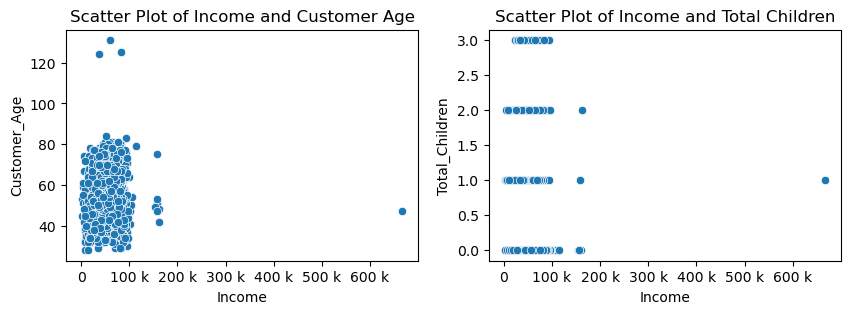

In [189]:
from matplotlib import ticker

fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=False)

sns.scatterplot(data=df, x='Income', y='Customer_Age', ax=ax[0])          
ax[0].set_title('Scatter Plot of Income and Customer Age')
ax[0].xaxis.set_major_formatter(ticker.EngFormatter()) 

sns.scatterplot(data=df, x='Income', y='Total_Children', ax=ax[1])          
ax[1].set_title('Scatter Plot of Income and Total Children')
ax[1].xaxis.set_major_formatter(ticker.EngFormatter()) 

plt.show()

In [190]:
# Pengecekan korelasi dengan metode Spearman karena data tidak terdistribusi Normal

df[['Customer_Age','Income','Total_Children']].corr(method='spearman')

,Customer_Age,Income,Total_Children
Customer_Age,1.000000,0.217326,0.086408
Income,0.217326,1.000000,-0.375448
Total_Children,0.086408,-0.375448,1.000000


Dari Hasil tes diatas, didapat bahwa data tidak terdistribusi normal (terdapat outlier) dan tidak terdapat korelasi yang kuat antara income, umur customer, maupun jumlah anak. 
Sedangkan terlihat adanya perbedaan income dengan segmentasi education sebagai berikut:

In [191]:
display(
    df[['Education','Income']].groupby(by='Education').mean().rename(columns={'Income':'Income (Average)'}),
    df[['Education','Income']].groupby(by='Education').median().rename(columns={'Income':'Income (Median)'})
)

,Income (Average)
Education,
Bachelor,52713.210952
High School,20306.259259
Master,51003.055062
PhD,56220.025105


,Income (Median)
Education,
Bachelor,52028.5
High School,20744.0
Master,49572.0
PhD,55236.0


Pada hal ini, pengisian data kosong pada income akan dilakukan sesuai dengan median pada segmentasi education. Walaupun rata-rata dan median pada kolom education tidak mempunyai perbedaan yang jauh, tetapi dikarenakan terdapat outlier dan data tidak terdistribusi normal, maka digunakan nilai median.

In [192]:
# Pengisian data missing value pada income

df.loc[(df['Income'].isna()) & (df['Education']=='Bachelor'),'Income']= df[df['Education'] == 'Bachelor']['Income'].median()
df.loc[(df['Income'].isna()) & (df['Education']=='High School'),'Income']= df[df['Education'] == 'High School']['Income'].median()
df.loc[(df['Income'].isna()) & (df['Education']=='Master'),'Income']= df[df['Education'] == 'Master']['Income'].median()
df.loc[(df['Income'].isna()) & (df['Education']=='PhD'),'Income']= df[df['Education'] == 'PhD']['Income'].median()


Setelah pengisian, dicek kembali apakah masih ada data yang kosong dan juga apakah nilai median atau mean berbeda signifikan

In [193]:
display(
    df.isna().sum(),
    df[['Education','Income']].groupby(by='Education').mean().rename(columns={'Income':'Income (Average)'}),
    df[['Education','Income']].groupby(by='Education').median().rename(columns={'Income':'Income (Median)'}),
)

ID                     0
Year_Birth             0
Customer_Age           0
Education              0
Marital_Status         0
Total_Children         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

,Income (Average)
Education,
Bachelor,52706.516000
High School,20306.259259
Master,50983.005254
PhD,56209.838509


,Income (Median)
Education,
Bachelor,52028.5
High School,20744.0
Master,49572.0
PhD,55236.0


Sudah tidak ada data yang kosong. Median dan mean juga tidak terganggu.

### **Data Duplikat**

Tahap selanjutnya adalah pengecekan apakah ada data yang terduplikat di dalam barisnya. Pertama akan dicek untuk data duplikat setiap barisnya:

In [194]:
df.duplicated().value_counts()

False    2233
Name: count, dtype: int64

In [195]:
# tes data apakah semua data unique (tidak ada duplikat data row yang sama)

duplicates=df[df.duplicated(keep=False)]
duplicates

,ID,Year_Birth,Customer_Age,Education,Marital_Status,Total_Children,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


Dengan hasil tabel yang menunjukkan data duplikat diatas kosong, dataset tidak memiliki data row yang terduplikat (semua baris mempunyai data yang berbeda minimal pada 1 kolom yang sama) dan sudah dibuktikan juga dengan jumlah kolom ID yang unique sama dengan jumlah seluruh baris.

Kemudian, akan dilakukan pengecekan kembali apakah dalam 1 nomor ID mempunyai kemungkinan terdapat customer yang sama. 

Hal ini akan dicek apakah dengan no ID yang berbeda, terdapat data yang memiliki tahun lahir, education, marital status, income, recency, tanggal customer pertama kali bertransaksi dan jumlah anak yang sama.

Terlampir di bawah ini tabel yang menunjukkan perhitungan jumlah ID dari kolom jumlah anak pada tahun lahir, marital status, recency, income dan jumlah anak yang sama.

In [196]:
duplicate_groups = df.groupby(['Year_Birth', 'Education', 'Marital_Status', 'Income', 
                                'Total_Children', 'Dt_Customer','Recency']).agg({
    'ID': pd.Series.nunique,
    }).reset_index()

duplicate_groups

,Year_Birth,Education,Marital_Status,Income,Total_Children,Dt_Customer,Recency,ID
0,1893,Master,Single,60182.0,1,2014-05-17,23,1
1,1899,PhD,Married,83532.0,0,2013-09-26,36,1
2,1900,Master,Divorced,36640.0,1,2013-09-26,99,1
3,1940,PhD,Single,51141.0,0,2013-07-08,96,1
4,1941,PhD,Married,93027.0,0,2013-04-13,77,1
...,...,...,...,...,...,...,...,...
2028,1995,Bachelor,Single,71163.0,0,2014-03-09,30,1
2029,1995,Master,Single,80617.0,0,2012-10-12,42,1
2030,1995,Master,Single,83257.0,0,2012-09-18,56,1
2031,1996,High School,Married,14421.0,0,2014-02-17,81,1


Dalam table diatas, jumlah maksimal value dari kolom ID adalah 1, menunjukkan bahwa hanya ada 1 data ID yang memiliki tahun lahir, education, marital status, income, recency, Dt_Customer dan jumlah anak yang sama.

Kemudian akan di cek apakah ada value yang melebihi dari 1 atau terdapat duplikat:

In [197]:
potential_duplicates = duplicate_groups[duplicate_groups['ID'] > 1]
potential_duplicates

,Year_Birth,Education,Marital_Status,Income,Total_Children,Dt_Customer,Recency,ID
8,1943,PhD,Divorced,48948.0,0,2013-02-01,53,2
27,1946,Bachelor,Married,37760.0,0,2012-08-31,20,2
30,1946,Master,Married,66835.0,0,2013-09-28,21,2
33,1946,PhD,Married,51012.0,0,2013-04-18,86,2
34,1946,PhD,Married,64014.0,3,2014-06-10,56,2
...,...,...,...,...,...,...,...,...
2006,1991,Master,Single,90638.0,0,2014-02-13,29,2
2007,1991,PhD,Married,68682.0,0,2013-10-06,56,2
2009,1992,Bachelor,Married,34935.0,0,2013-06-21,71,2
2023,1993,Bachelor,Single,74293.0,0,2014-05-04,66,2


Terdapat total 193 kasus dimana data customer yang sama dan memiliki ID yang berbeda. Diambil dari salah satu contoh, berikut detail data yang terduplikat: 

In [198]:
display(
    df[(df['Year_Birth']==1943)&(df['Marital_Status']=='Divorced')&(df['Recency']==53)],
    df[(df['Year_Birth']==1952)&(df['Marital_Status']=='Married')&(df['Recency']==57)&(df['Income']==83844.0)]
)

,ID,Year_Birth,Customer_Age,Education,Marital_Status,Total_Children,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
39,2968,1943,81,PhD,Divorced,0,48948.0,0,0,2013-02-01,...,10,5,6,1,0,0,0,0,0,1
894,8800,1943,81,PhD,Divorced,0,48948.0,0,0,2013-02-01,...,10,5,6,1,0,0,0,0,0,1


,ID,Year_Birth,Customer_Age,Education,Marital_Status,Total_Children,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
745,3560,1952,72,Bachelor,Married,0,83844.0,0,0,2013-05-12,...,4,11,1,0,0,1,0,0,0,0
1007,241,1952,72,Bachelor,Married,0,83844.0,0,0,2013-05-12,...,4,11,1,0,0,1,0,0,0,0
1467,7521,1952,72,Bachelor,Married,0,83844.0,0,0,2013-05-12,...,4,11,1,0,0,1,0,0,0,0


Untuk menghapus data duplikat. Dipilih hanya satu ID yang mewakili customer tersebut dengan kriteria ID dan nilai Recency yang diambil adalah nilai terkecil

In [199]:
# Fungsi untuk memilih data duplikat dengan ID dan recency yang paling kecil

def select_record(group):
    # Sort by Recency, lalu Customer_ID, and ambil yang pertama
    return group.sort_values(by=['Recency', 'ID'], ascending=[True, True]).iloc[0]

In [200]:
# Mendefinisikan kembali data yang dipilih. Data dibersihkan dari customer yang terduplikat dan memiliki ID berbeda

df = df.groupby(['Year_Birth', 'Education', 'Marital_Status', 'Income', 
                         'Kidhome', 'Teenhome', 'Dt_Customer']).apply(select_record).reset_index(drop=True)

df

,ID,Year_Birth,Customer_Age,Education,Marital_Status,Total_Children,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,11004,1893,131,Master,Single,1,60182.0,0,1,2014-05-17,...,0,2,4,0,0,0,0,0,0,0
1,1150,1899,125,PhD,Married,0,83532.0,0,0,2013-09-26,...,6,4,1,0,0,1,0,0,0,0
2,7829,1900,124,Master,Divorced,1,36640.0,1,0,2013-09-26,...,1,2,5,0,0,0,0,0,1,0
3,6663,1940,84,PhD,Single,0,51141.0,0,0,2013-07-08,...,1,4,5,0,0,0,0,0,0,0
4,6932,1941,83,PhD,Married,0,93027.0,0,0,2013-04-13,...,10,5,2,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,10548,1995,29,Bachelor,Single,0,71163.0,0,0,2014-03-09,...,8,12,1,0,0,0,0,0,0,0
2029,3661,1995,29,Master,Single,0,80617.0,0,0,2012-10-12,...,6,8,2,0,0,0,0,0,0,0
2030,4427,1995,29,Master,Single,0,83257.0,0,0,2012-09-18,...,10,12,6,1,0,1,0,0,1,1
2031,193,1996,28,High School,Married,0,14421.0,0,0,2014-02-17,...,0,2,5,1,0,0,0,0,0,0


## **Data Bersih**

Data yang sudah bersih akan dilanjutkan proses analisis. Berikut informasi data sekilas yang sudah dibersihkan:

In [201]:
listItem=[]

for col in df.columns:
    listItem.append([col, df[col].dtypes, df[col].isna().sum(), df[col].nunique(), df[col].unique()[0:5]])

print(df.shape)
dfDesc = pd.DataFrame(data=listItem, columns= ['Data Features','Data Type', 'Null', 'Unique', 'Unique Sample'])
dfDesc

(2033, 29)


,Data Features,Data Type,Null,Unique,Unique Sample
0,ID,int64,0,2033,"[11004, 1150, 7829, 6663, 6932]"
1,Year_Birth,int64,0,59,"[1893, 1899, 1900, 1940, 1941]"
2,Customer_Age,int64,0,59,"[131, 125, 124, 84, 83]"
3,Education,object,0,4,"[Master, PhD, Bachelor, High School]"
4,Marital_Status,object,0,4,"[Single, Married, Divorced, Widow]"
5,Total_Children,int64,0,4,"[1, 0, 3, 2]"
6,Income,float64,0,1974,"[60182.0, 83532.0, 36640.0, 51141.0, 93027.0]"
7,Kidhome,int64,0,3,"[0, 1, 2]"
8,Teenhome,int64,0,3,"[1, 0, 2]"
9,Dt_Customer,datetime64[ns],0,663,"[2014-05-17 00:00:00, 2013-09-26 00:00:00, 2013-07-08 00:00:00, 2013-04-13 00:00:00, 2013-08-20 00:00:00]"


Sebelum dibersihkan, data memiliki 2240 baris data. Setelah dibersihkan, data menjadi 2033 baris.

Total baris data yang dihapuskan adalah 207 baris dan data yang kosong sudah diisi dengan data yang dirasa relevan. 

## **Data Analysis**

Setelah tahap *data cleaning* selesai dan data sudah bersih dari data kosong dan data duplikat. Sekarang akan dilanjutkan ke tahap selanjutnya yaitu tahap analisis data untuk mengetahui perilaku setiap segmentasi customer serta apa yang mempengaruhi total sales yang tinggi.

Analisis akan dilakukan dengan melakukan analisis RFM terlebih dahulu untuk mengetahui karakteristik customer.

### **RFM Analysis**

RFM Analysis digunakan untuk segmentasi customer berdasarkan informasi kebiasaan dari customer itu sendiri. Adapun metrik yang akan dianalisa adalah sebagai berikut:

- Recency : berapa lama sejak customer melakukan pembelian.
- Frequency : seberapa sering customer melakukan transaksi.
- Monetary : jumlah pengeluaran customer dalam transaksi.

Metrik-metrik dalam RFM akan digunakan untuk mengetahui karakteristik dari suatu customer dan juga untuk mengetahui value dari suatu customer. Menggunakan metrik tersebut, akan dibuat suatu segmen customer berdasarkan nilainya misal high-value, medium-value, dan low-value.

### Perhitungan Nilai RFM

Sekarang mari kita hitung nilai recency, frequency dan monetary. Dalam kasus ini, kita juga mengasumsikan bahwa kita ingin mengelompokkan customer kita ke dalam 4 segmen dengan ketentuan berikut:



Setiap metrik akan dibagi menjadi 4 bagian menggunakan kuartil. Berikut beberapa metrik yang akan digunakan:

- Frequency akan mempunyai kategori nilai dari 1-4, makin banyak makin besar nilainya.
- Recency akan mempunyai kategori nilai dari 1-4, semakin dekat waktu belanja, semakin besar nilainya, karena semakin minim recency berarti paling dekat waktu pembelanjaannya.
- Monetary akan mempunyai kategori nilai dari 1-4, makin besar nilai belanjanya makin besar nilai dari monetary.
- Final values / Nilai RFM: Jumlah dari nilai Frequency, Recency dan Monetary. Nilai RFM akan berkisar dari nilai dari 3 (nilai minimum adalah 1, terdapat tiga elemen) dan nilai maksimum 12 (nilai maksimum adalah 4 untuk masing-masing elemen).


Untuk perhitungan nilai RFM, akan dibuat duplikat dataset yang berisikan hanya kolom dibutuhkan terlebih dahulu yaitu:
1. ID: Pengidentifikasi unik customer
2. Recency: Jumlah hari sejak pembelian terakhir customer

Kolom lainnya akan bertahap ditambahkan sesuai kebutuhan analisis

In [202]:
df_RFM=df[['ID','Recency']].copy()

### Recency

Recency adalah berapa lama waktu customer dalam melakukan transaksi terakhirnya. Dalam dataset ini, sudah terdapat kolom Recency yaitu jumlah hari sejak transaksi terakhir customer

In [203]:
df_RFM[['ID','Recency']].head()

,ID,Recency
0,11004,23
1,1150,36
2,7829,99
3,6663,96
4,6932,77


### Frequency

Frekuensi adalah seberapa sering customer melakukan transaksi. Dari dataset ini, akan diambil total transaksi dari transaksi pada website perusahaan, menggunakan katalog dan langsung di toko. Nama ketiga kolom adalah berikut:
1. NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
2. NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
3. NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko

In [204]:
df_RFM['Frequency']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df_RFM[['ID','Frequency']].head()

,ID,Frequency
0,11004,3
1,1150,14
2,7829,5
3,6663,8
4,6932,22


### Monetary

Untuk metriks Monetary, seberapa banyak pengeluaran customer dalam setiap transaksi. 
Nilai monetary dapat diperoleh dari total pengeluaran customer untuk seluruh produk supermarket. Kolom yang akan dijumlahkan adalah sebagai berikut:
1. MntWines: Jumlah yang dihabiskan untuk anggur dalam 2 tahun terakhir
2. MntFruits: Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir
3. MntMeatProducts: Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
4. MntFishProducts: Jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir
5. MntSweetProducts: Jumlah yang dihabiskan untuk makanan manis dalam 2 tahun terakhir
6. MntGoldProds: Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir

Kolom baru akan dibuat untuk menunjukkan nilai total spending customer / monetary pada seluruh transaksi customer.

In [205]:
df_RFM['Monetary']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

df_RFM[['ID','Monetary']].head()

,ID,Monetary
0,11004,22
1,1150,1853
2,7829,65
3,6663,157
4,6932,2119


### **RFM Segmentation**

#### Recency Segmentation

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


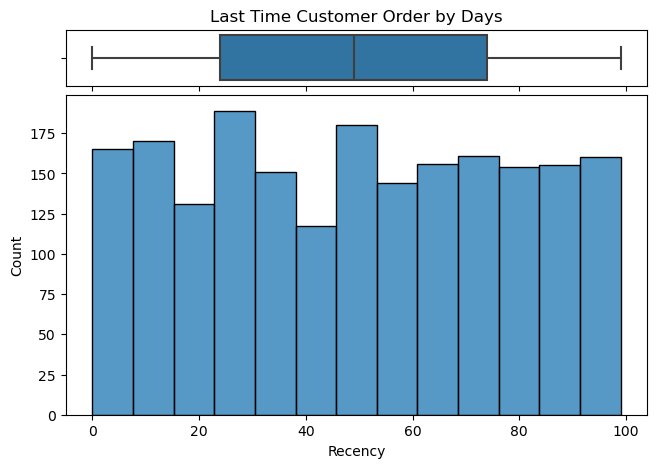

0.00    0.0 
0.25    24.0
0.50    49.0
0.75    74.0
1.00    99.0
Name: Recency, dtype: float64

In [206]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_RFM, x='Recency', ax=ax_top)
sns.histplot(data=df_RFM, x='Recency', ax=ax_bot)

ax_top.set(
    title='Last Time Customer Order by Days'
)

plt.show()
display(df_RFM['Recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, customer akan dikelompokkan berdasarkan nilai recency ke dalam 4 kelompok yaitu :
- 4 (Active) : melakukan transaksi kurang dari 24 hari terakhir
- 3 (Warm) : melakukan transaksi antara 24 hingga 49 hari terakhir
- 2 (Cold) : melakukan transaksi antara 49 hingga 74 hari terakhir
- 1 (Inactive) : melakukan transaksi lebih dari 74 hari terakhir

In [207]:
df_RFM['R_score'] = pd.qcut(
    df_RFM['Recency'],                  # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[4, 3, 2, 1]                 # pelabelan, untuk recency: semakin kecil, maka semakin besar skornya
).astype(int)

df_RFM.head()

,ID,Recency,Frequency,Monetary,R_score
0,11004,23,3,22,4
1,1150,36,14,1853,3
2,7829,99,5,65,1
3,6663,96,8,157,1
4,6932,77,22,2119,1


#### Frequency Segmentation

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


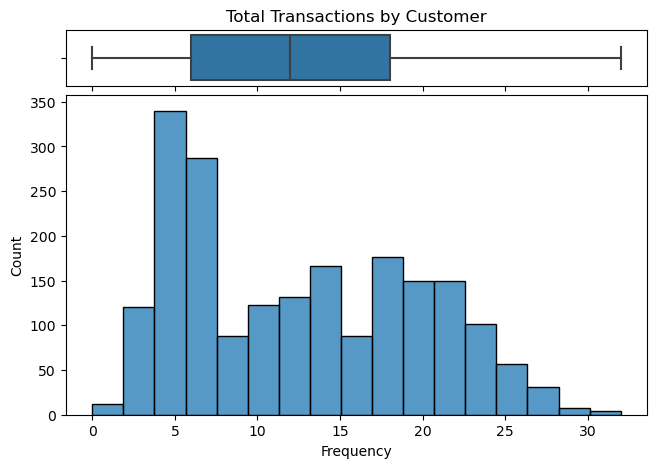

0.00    0.0 
0.25    6.0 
0.50    12.0
0.75    18.0
1.00    32.0
Name: Frequency, dtype: float64

In [208]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_RFM, x='Frequency', ax=ax_top)
sns.histplot(data=df_RFM, x='Frequency', ax=ax_bot)

ax_top.set(
    title='Total Transactions by Customer'
)

plt.show()
display(df_RFM['Frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, customer akan dikelompokkan berdasarkan frequency ke dalam 4 kelompok mengacu pada jumlah transaksi yang kita tentukan yaitu:
- 4 (Loyal) : melakukan transaki lebih dari 18 kali
- 3 (High) : melakukan transaksi 13 hingga 18 kali
- 2 (Medium) : melakukan transaksi 7 hingga 12 kali
- 1 (Low) : melakukan transaksi hanya 0 hingga 6 kali.

In [209]:
def f_score(x):
    if x<=6:
        return 1
    elif x <= 12:
        return 2
    elif x <= 18:
        return 3
    else:
        return 4

df_RFM['F_score'] = df_RFM['Frequency'].apply(f_score)
df_RFM.head()

,ID,Recency,Frequency,Monetary,R_score,F_score
0,11004,23,3,22,4,1
1,1150,36,14,1853,3,3
2,7829,99,5,65,1,1
3,6663,96,8,157,1,2
4,6932,77,22,2119,1,4


#### Monetary Segmentation

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


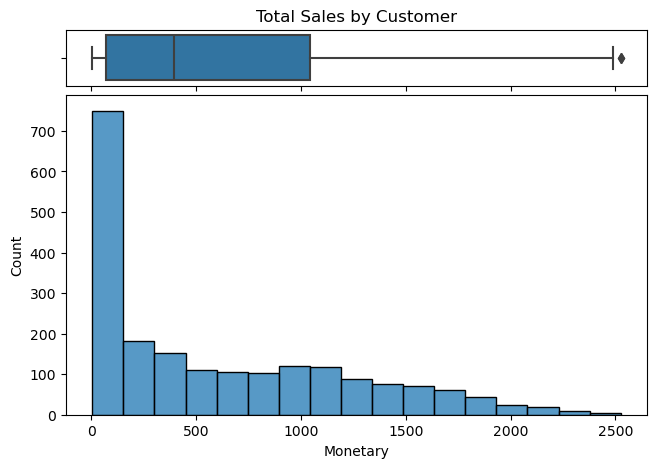

0.00    5.0   
0.25    68.0  
0.50    396.0 
0.75    1044.0
1.00    2525.0
Name: Monetary, dtype: float64

In [210]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_RFM, x='Monetary', ax=ax_top)
sns.histplot(data=df_RFM, x='Monetary', ax=ax_bot)

ax_top.set(
    title='Total Sales by Customer'
)

plt.show()
display(df_RFM['Monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan monetary-nya ke dalam 4 kelompok yaitu :
- 4 (Top Spender) : melakukan transaksi lebih dari 1044.5 dollar
- 3 (High Spender) : melakukan transaksi antara 396.0 hingga 1044.5 dollar
- 2 (Medium Spender) : melakukan transaksi antara 68.5 hingga 396.0 dollar
- 1 (Low Spender) : melakukan transaksi kurang dari dari 68.5 dollar

In [211]:
df_RFM['M_score'] = pd.qcut(
    df_RFM['Monetary'],                 # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk monetary: semakin besar, maka semakin besar skornya
).astype(int)

df_RFM.head()

,ID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,11004,23,3,22,4,1,1
1,1150,36,14,1853,3,3,4
2,7829,99,5,65,1,1,1
3,6663,96,8,157,1,2,2
4,6932,77,22,2119,1,4,4


### Nilai Total RFM

Nilai total RFM akan didapatkan dari jumlah nilai R_score, F_score dan M_score

In [212]:
df_RFM['RFM_score'] = df_RFM['R_score'] + df_RFM['F_score'] + df_RFM['M_score']
df_RFM.sample(5, random_state=42)

,ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
692,2942,20,13,486,4,3,3,10
987,4023,29,7,115,3,2,2,7
552,5332,2,16,1066,4,3,4,11
596,1729,14,18,1377,4,3,4,11
1967,7646,70,20,805,2,4,3,9



## Kategori Nilai RFM

### Segmentasi Umum

Kita dapat memberikan nama dari setiap segmentasi value customer sesuai dengan nilai RFM menjadi sebagai berikut:

- Low Tier Customer: Nilai RFM 3-5
- Mid Tier Customer: Nilai RFM 6-7
- High Tier Customer: Nilai RFM 8-10
- Top Tier Customer: Nilai RFM 11-12

In [213]:
def rfm_tier_segmentation(x):
    if x <= 5:
        return 'Low Tier'
    elif x <= 7:
        return 'Middle Tier'
    elif x <= 10:
        return 'High Tier'
    else:
        return 'Top Tier'

df_RFM['RFM_Tier'] = df_RFM['RFM_score'].apply(rfm_tier_segmentation)
df_RFM.head()

,ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_Tier
0,11004,23,3,22,4,1,1,6,Middle Tier
1,1150,36,14,1853,3,3,4,10,High Tier
2,7829,99,5,65,1,1,1,3,Low Tier
3,6663,96,8,157,1,2,2,5,Low Tier
4,6932,77,22,2119,1,4,4,9,High Tier


### Segmentasi Spesifik

Selain dari segmentasi umum tersebut, dapat di spesifikasikan lebih lanjut untuk dilakukan analisis dan treatment khusus. Berikut adalah 6 Segmentasi Spesifik:

1. **Hibernating Customer**

    Customer yang memiliki nilai keseluruhan RFM paling rendah 
    
    (Nilai RFM:3-6 dan secara urutan, nilai R,F,M adalah (1-2),(1-2),(1-2))

2. **Churned New Best Customer**
    
    Customer yang sudah lama tidak melakukan transaksi dan frekuensi/jumlah transaksi rendah namun nilai monetary yang tinggi. 
    
    (Nilai RFM: 5-8 dan secara urutan, nilai R,F,M adalah (1-2),(1-2),(3-4))

3. **At-Risk Customer**

    Customer yang sebelumnya loyal jumlah transaksi dan monetary nya cukup besar, namun sudah lama semenjak transaksi terakhir customer (recency rendah). 
    
    (Nilai RFM: 7-10 dan secara urutan, nilai R,F,M adalah (1-2),(3-4),(3-4))


4. **Potential Loyalist**

    Customer yang mempunyai probabilitas yang dapat menjadi loyal customer. Ciri-ciri customer ini adalah memiliki nilai recency yang tinggi, namun nilai frequency dan monetary pada nilai median 
    
    (Nilai RFM: 7-10 dan secara urutan, nilai R,F,M adalah (3-4),(2-3),(2-3))


5. **Loyal Customer**

    Customer loyal yang mempunyai nilai frequency dan recency tinggi, namun nilai monetary nya ada pada nilai median dan lebih kecil dari VIP. 
    
    (Nilai RFM: 9-11 dan secara urutan, nilai R,F,M adalah (3-4),4,(2-3))
 

6. **VIP Customer**

    Customer loyal yang mempunyai nilai frequency, recency dan monetary paling tinggi dimana customer ini adalah loyal customer yang juga merupakan heavy spender atau nilai transaksinya tinggi. 
    
    (Nilai RFM: 12 dan secara urutan, nilai R,F,M adalah 4,4,4)

In [214]:
def rfm_spec_segmentation(x, recency, freq, monetary):
    if x == 12:
        return 'VIP Customer'
    elif (9 <= x <= 11) and (3 <= recency <= 4) and (freq == 4) and (2 <= monetary <= 3):
        return 'Loyal Customer'
    elif (7 <= x <= 10) and (3 <= recency <= 4) and (2 <= freq <= 3) and (2 <= monetary <= 3):
        return 'Potential Loyalist'
    elif (7 <= x <= 10) and (1 <= recency <= 2) and (3 <= freq <= 4) and (3 <= monetary <= 4):
        return 'At-Risk Customer'
    elif (5 <= x <= 8) and (1 <= recency <= 2) and (1 <= freq <= 2) and (3 <= monetary <= 4):
        return 'Churned New Best Customer'
    elif (3 <= x <= 6) and (1 <= recency <= 2) and (1 <= freq <= 2) and (1 <= monetary <= 2):
        return 'Hibernating Customer'
    else:
        return 'Other'

# Apply function di DataFrame
df_RFM['RFM_Specification'] = df_RFM.apply(lambda row: rfm_spec_segmentation(row['RFM_score'], row['R_score'], row['F_score'], row['M_score']), axis=1)

display(
    df_RFM[['RFM_Specification','Monetary','ID']].groupby(by='RFM_Specification').agg({'ID': pd.Series.nunique,'Monetary':'sum'}),
    df_RFM.tail()
)

,ID,Monetary
RFM_Specification,,
At-Risk Customer,493,546278
Churned New Best Customer,23,25140
Hibernating Customer,488,52108
Loyal Customer,104,87362
Other,529,290211
Potential Loyalist,328,129358
VIP Customer,68,101335


,ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_Tier,RFM_Specification
2028,10548,30,23,960,3,4,3,10,High Tier,Loyal Customer
2029,3661,42,18,1435,3,3,4,10,High Tier,Other
2030,4427,56,27,1365,2,4,4,10,High Tier,At-Risk Customer
2031,193,81,3,16,1,1,1,3,Low Tier,Hibernating Customer
2032,9909,24,7,122,4,2,2,8,High Tier,Potential Loyalist


In [215]:
CustCount_percentage_Other = df_RFM['RFM_Specification'].value_counts()['Other']/df_RFM['ID'].nunique()*100
Monetary_percentage_Other = df_RFM['Monetary'][df_RFM['RFM_Specification']=='Other'].sum()/df_RFM['Monetary'].sum()*100
print(f"Jumlah customer dengan segmentasi 'Other' adalah {df_RFM['RFM_Specification'].value_counts()['Other']} atau {CustCount_percentage_Other:.2f}% dari jumlah data customer")
print(f"Jumlah monetary customer dengan segmentasi 'Other' adalah {df_RFM['Monetary'][df_RFM['RFM_Specification']=='Other'].sum()} atau {Monetary_percentage_Other:.2f}% dari jumlah data customer")

Jumlah customer dengan segmentasi 'Other' adalah 529 atau 26.02% dari jumlah data customer
Jumlah monetary customer dengan segmentasi 'Other' adalah 290211 atau 23.56% dari jumlah data customer


Pada hasil spesifikasi diatas, terdapat segemntasi **'Other'** dimana segmentasi ini tidak termasuk kedalam kriteria 6 segmentasi spesifik. Jumlah customer yang masuk dalam kategori Other adalah 529 atau 26.02% dari total data customer, dan jumlah sales/monetary nya adalah 290.211 atau 23.56% dari jumlah data. 

Maka itu, untuk selanjutnya analisis akan lebih fokus kepada customer dengan 6 segementasi spefisfik.

Berikut Barplot dari segmentasi spesifik customer:

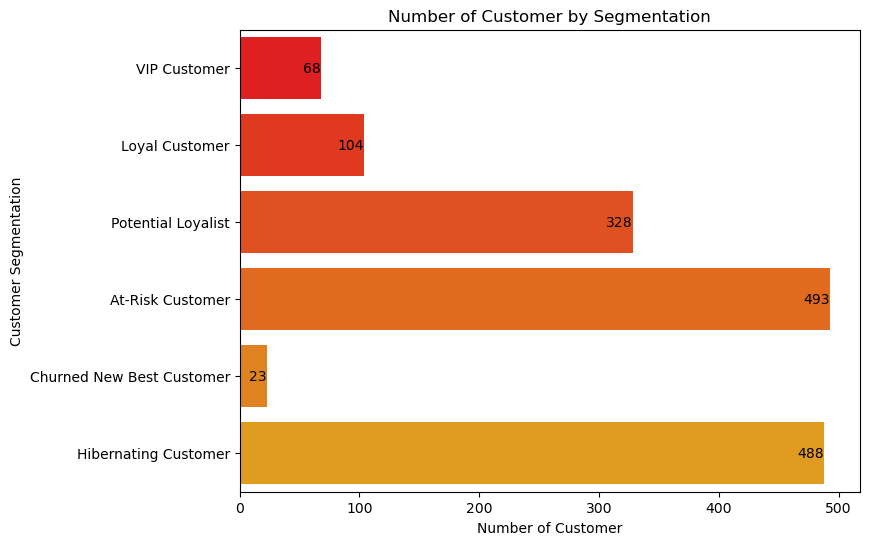

In [216]:
# membuat figura
fig, ax = plt.subplots(figsize=(8, 6))

# membuat warna
color_palette = sns.blend_palette(['red', 'orange'])

# membuat count plot
ax = sns.countplot(
    data=df_RFM[df_RFM['RFM_Specification']!='Other'],
    y='RFM_Specification',
    order=['VIP Customer', 'Loyal Customer', 'Potential Loyalist', 'At-Risk Customer','Churned New Best Customer','Hibernating Customer'],
    palette=color_palette
)

# mengatur judul dan label
ax.set(
    title='Number of Customer by Segmentation',
    ylabel='Customer Segmentation',
    xlabel='Number of Customer'
)

# menambahkan label
for bar in ax.patches:
    x, y = bar.get_xy()
    ax.text(
        x + bar.get_width(),
        y + bar.get_height()/2,
        f'{bar.get_width():,.0f}',
        ha='right',
        va='center'
    )

plt.show()

In [217]:
df_RFM.groupby('RFM_Specification').agg(
    n_customer=('ID', 'count'),
    median_recency=('Recency', 'median'),
    median_frequency=('Frequency', 'median'),
    median_monetary=('Monetary', 'median'),
).sort_values('median_monetary',ascending=False)

,n_customer,median_recency,median_frequency,median_monetary
RFM_Specification,,,,
VIP Customer,68,12.0,22.0,1442.5
At-Risk Customer,493,73.0,19.0,1049.0
Churned New Best Customer,23,73.0,11.0,957.0
Loyal Customer,104,21.0,21.0,842.0
Potential Loyalist,328,25.0,12.0,367.5
Hibernating Customer,488,76.0,6.0,69.0
Other,529,28.0,6.0,68.0


## Karakteristik Segmentasi Customer dengan Jumlah Tawaran Campaign yang diterima  

Pada bagian ini, akan dilihat hubungan antara segmentasi customer yang sudah didefinisikan dengan RFM dibandingkan dengan campaing yang diikuti. Terdapat 5 campaign berbeda yang pernah dilakukan oleh perusahaan. Analaisis perbandingan ini akan menjawab pertanyaan berikut:

1. Dari 5 campaign yang dilakukan, campaign manakah yang lebih banyak diikuti oleh customer?
2. Pada segmentasi customer, apakah ada segmen yang mempunyai ketertarikan khusus pada campaign tertentu? 

Pertama, akan dibuat dataframe dan grafik yang dibutuhkan untuk melihat perbandingan tersebut:

In [218]:
df_campaign = pd.merge(df[['ID','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']],df_RFM[['ID','RFM_Tier','RFM_Specification']], on='ID',how='inner')
df_campaign.head()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,RFM_Tier,RFM_Specification
0,11004,0,0,0,0,0,Middle Tier,Other
1,1150,0,0,0,0,1,High Tier,Other
2,7829,0,0,0,0,0,Low Tier,Hibernating Customer
3,6663,0,0,0,0,0,Low Tier,Hibernating Customer
4,6932,0,0,0,0,1,High Tier,At-Risk Customer


In [219]:
df_campaign[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum()

AcceptedCmp1    133
AcceptedCmp2    26 
AcceptedCmp3    147
AcceptedCmp4    155
AcceptedCmp5    146
dtype: int64

Dari data tersebut, akan dibuat menjadi grafik berikut:

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8936\1650895439.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1, 2, 3, 4, 5])  # Label x-axis as 1, 2, 3, 4, 5


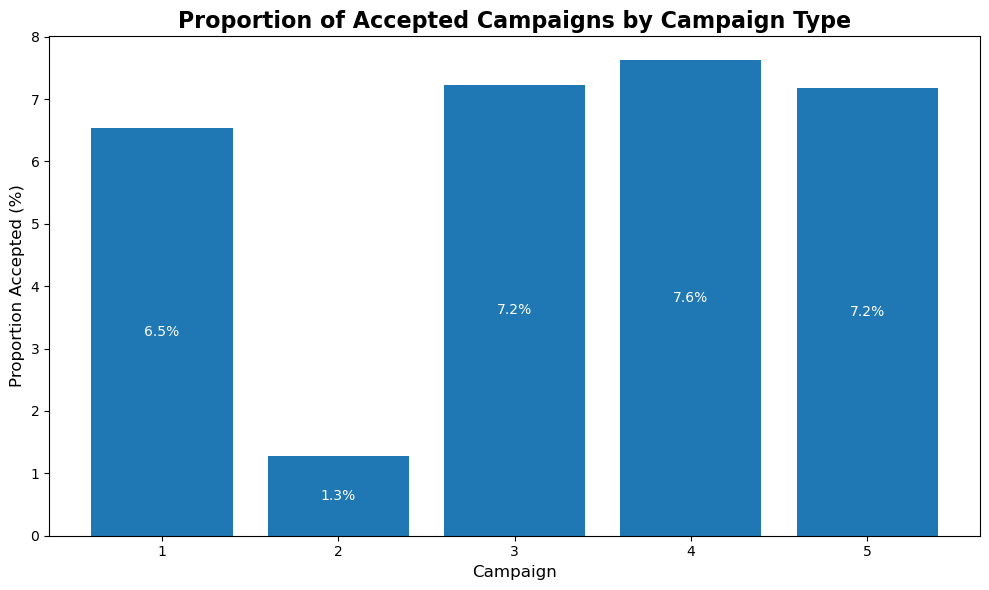

In [220]:
# Ubah DataFrame ke format panjang
df_melted = df_campaign.melt(id_vars=['RFM_Specification'], 
                              value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], 
                              var_name='Campaign', 
                              value_name='Accepted')

# Hitung proporsi kampanye yang diterima berdasarkan tipe kampanye
proportions = df_melted.groupby('Campaign')['Accepted'].mean().reset_index()
proportions['Accepted'] = proportions['Accepted'] * 100  # konversi menjadi persentase

# Plot grafik 
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(proportions['Campaign'], proportions['Accepted'], color='tab:blue')

# Tambahkan judul dan label
plt.title('Proportion of Accepted Campaigns by Campaign Type', fontsize=16, fontweight='bold')
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Proportion Accepted (%)', fontsize=12)
ax.set_xticklabels([1, 2, 3, 4, 5])  # Label x-axis as 1, 2, 3, 4, 5

# Tambahkan label persentase di dalam setiap bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.1f}%', ha='center', va='center', color='white', fontsize=10)

# Sesuaikan layout untuk mencegah overlap
plt.tight_layout()

# Tampilkan plot
plt.show()

In [221]:
df_campaign[['RFM_Specification','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].groupby(by='RFM_Specification').sum()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
RFM_Specification,,,,,
At-Risk Customer,58,11,32,70,68
Churned New Best Customer,2,1,3,4,5
Hibernating Customer,0,0,26,10,0
Loyal Customer,8,1,9,12,5
Other,44,8,48,28,48
Potential Loyalist,7,2,22,20,0
VIP Customer,14,3,7,11,20


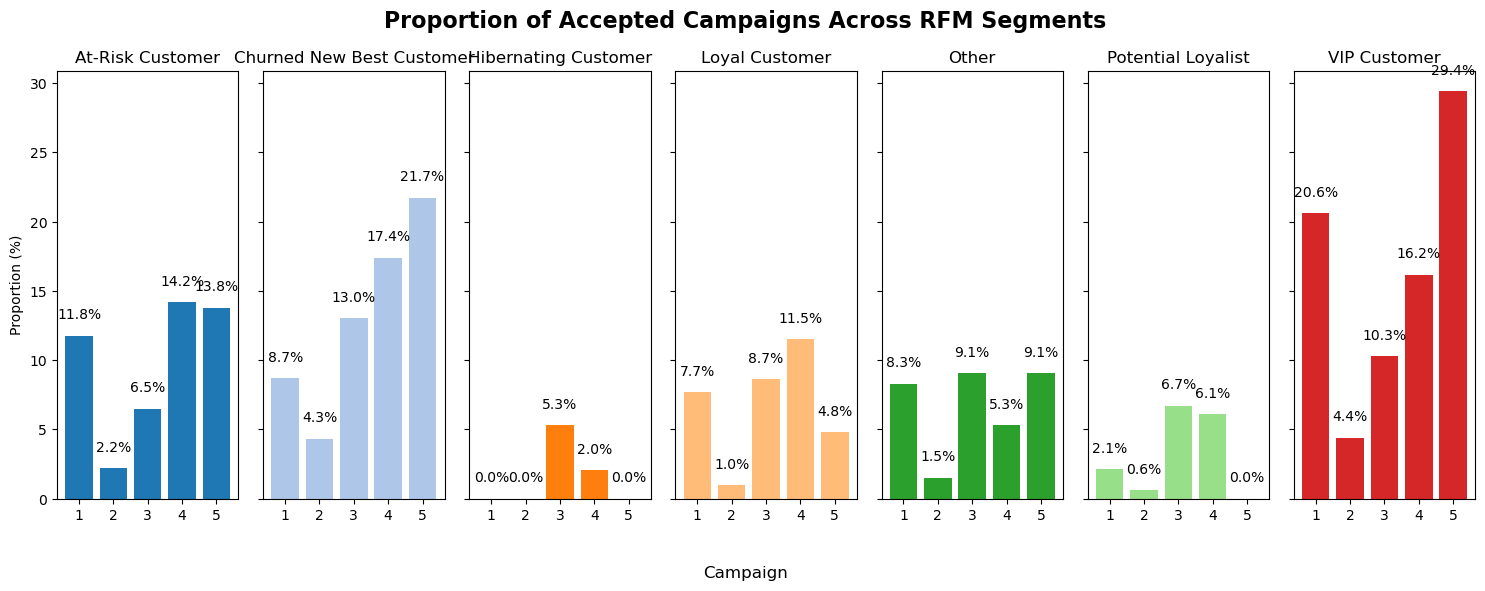

In [222]:
# Ubah DataFrame ke format panjang
df_melted = df_campaign.melt(id_vars=['RFM_Specification'], 
                              value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], 
                              var_name='Campaign', 
                              value_name='Accepted')

# Hitung proporsi campaign yang diterima
proportions = df_melted.groupby(['RFM_Specification', 'Campaign'])['Accepted'].mean().reset_index()
proportions['Accepted'] = proportions['Accepted'] * 100  # Convert to percentage

# Pivot data untuk grafik batang
pivot_table = proportions.pivot(index='Campaign', columns='RFM_Specification', values='Accepted').fillna(0)

# Siapkan subplot
num_segments = len(pivot_table.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_segments, figsize=(15, 6), sharey=True)

# Definisikan warna untuk setiap segmen (sesuaikan jumlahnya jika ada lebih banyak segmen)
colors = plt.cm.tab20.colors

# Plot setiap segmen di subplot yang terpisah
for ax, (segment, data), color in zip(axes, pivot_table.items(), colors):
    ax.bar(data.index, data.values, color=color)
    ax.set_title(segment)
    ax.set_xticks(range(len(data.index)))
    ax.set_xticklabels([1, 2, 3, 4, 5]) # Label sumbu x sebagai 1, 2, 3, 4, 5
    
    # Tambahkan label persentase di setiap batang
    for i, value in enumerate(data.values):
        ax.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', color='black')
        
# Tambahkan judul untuk keseluruhan plot
fig.suptitle('Proportion of Accepted Campaigns Across RFM Segments', fontsize=16, fontweight='bold')

# Set label y-axis hanya untuk grafik paling kiri
axes[0].set_ylabel('Proportion (%)')

# Set 1 label x-axis di bawah semua subplot
fig.text(0.5, 0.04, 'Campaign', ha='center', va='center', fontsize=12)

# Sesuaikan layout dan tampilkan grafik
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Sesuaikan rect untuk memberi ruang pada label sumbu x
plt.show()

Dari kedua grafik diatas, dapat dijawab untuk pertanyaan sebelumnya:

1. Dari 5 campaign yang dilakukan, manakah yang lebih banyak yang diikuti oleh customer?

    Secara keseluruhan, semua persentase partisipasi setiap campaign oleh customer masih dibawah 10% dari total data customer. 
    
    Dari proporsi setiap campaign, dapat dilihat bahwa campaign 1,3,4 dan 5 mempunyai proporsi partisipasi yang hampir sama. Sedangkan yang paling kecil persentasi partisipasinya adalah campaign kedua yaitu hanya 1,3% dari seluruh customer. Selain itu, juga dapat dilihat pada grafik kedua dimana hampir seluruh segmentasi mempunyai proporsi partisipasi paling kecil pada campaign kedua.

2. Apakah setiap segmentasi customer mempunyai ketertarikan khusus pada campaign tertentu? 

    Pertanyaan ini akan dijawab lebih lanjut dengan uji statistik terlebih dahulu

In [223]:
from scipy.stats import chi2_contingency

# Daftar campaign
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Daftar segmen RFM
rfm_segments = df_campaign['RFM_Specification'].unique()

# Dictionary untuk menyimpan hasil
results = {}

# Iterasi untuk setiap segmen RFM
for segment in rfm_segments:
    print(f'\nUji Chi-Square untuk segmen {segment}:')

    # Ambil data untuk segmen RFM tertentu
    segment_data = df_campaign[df_campaign['RFM_Specification'] == segment]

    # Buat tabel kontingensi untuk partisipasi campaign
    contingency_table = pd.DataFrame({
        'AcceptedCmp1': segment_data['AcceptedCmp1'],
        'AcceptedCmp2': segment_data['AcceptedCmp2'],
        'AcceptedCmp3': segment_data['AcceptedCmp3'],
        'AcceptedCmp4': segment_data['AcceptedCmp4'],
        'AcceptedCmp5': segment_data['AcceptedCmp5']
    }).apply(pd.Series.value_counts).fillna(0).astype(int)

    # Print tabel kontingensi untuk pemeriksaan
    print("Tabel Kontingensi:")
    print(contingency_table)

    # Lakukan uji chi-square untuk partisipasi campaign
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    # Simpan hasil
    results[segment] = {
        'Chi2 Statistic': chi2,
        'p-value': p
    }

    print(f"Chi2 Statistic: {chi2}")
    print(f"p-value: {p}")

    if p < 0.05:
        print(f"Terdapat perbedaan signifikan dalam ketertarikan terhadap campaign di segmen {segment}.\n")
    else:
        print(f"Tidak terdapat perbedaan signifikan dalam ketertarikan terhadap campaign di segmen {segment}.\n")

# Tampilkan hasil secara keseluruhan
print('\nHasil Uji Chi-Square:')
for segment, stats in results.items():
    print(f"Segmen {segment}: Chi2 Statistic = {stats['Chi2 Statistic']}, p-value = {stats['p-value']}")


Uji Chi-Square untuk segmen Other:
Tabel Kontingensi:
   AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5
0  485           521           481           501           481         
1  44            8             48            28            48          
Chi2 Statistic: 36.42365330093155
p-value: 2.3674065215675562e-07
Terdapat perbedaan signifikan dalam ketertarikan terhadap campaign di segmen Other.


Uji Chi-Square untuk segmen Hibernating Customer:
Tabel Kontingensi:
   AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5
0  488           488           462           478           488         
1  0             0             26            10            0           
Chi2 Statistic: 72.85265298576448
p-value: 5.667931723168406e-15
Terdapat perbedaan signifikan dalam ketertarikan terhadap campaign di segmen Hibernating Customer.


Uji Chi-Square untuk segmen At-Risk Customer:
Tabel Kontingensi:
   AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  Ac

Untuk melihat proporsi keikutsertaan campaign pada setiap segmen dan menjawab pertanyaan kedua, diuji secara statistik Chi-contingency, apakah ada perbedaan signifikan untuk keikutsertaan campaign tertentu pada setiap segmen. Semua segmen memiliki p-value dibawah 0.05 kecuali untuk segmen Churned New Best Customer dan artinya perbedaan proporsi keikutsertaan antara campaign untuk segmen ini tidak signifikan. Hal ini dapat disebabkan karena jumlah customer pada segmen ini sedikit.

Maka untuk segmen lainnya, bisa dilihat terdapat perbedaan signifikan minimal pada salah satu campaign. Sesuai dengan grafik sebelumnya, proporsi ketertarikan dapat dilihat sebagai berikut:
- VIP Customer: campaign yang paling banyak diikuti adalah campaign 5.
- At-Risk Customer: campaign 1, 4 dan 5 mempunyai proporsi mirip dan yang paling banyak diikuti.
- Hibernating Customer: campaign yang pernah diikuti hanya pada campaign 3 dan 4 yaitu 5.3% untuk campaign 3 dan 2% untuk campaign 4.
- Loyal Customer: campaign yang paling banyak diikuti adalah campaign 4.
- Potential Loyalist: campaign yang paling banyak diikuti adalah campaign 3 dan 4.

## Karakteristik Segmentasi Customer dengan Jumlah Pembelian pada Kategori Produk  

Pada bagian ini, akan dilihat hubungan antara segmentasi customer yang sudah didefinisikan dengan RFM dibandingkan dengan jumlah pembelian pada kategori produk. Analaisis perbandingan ini akan menjawab pertanyaan berikut:

1. Dari 6 kategori produk yang dijual, kategori manakah yang nilai penjualannya paling tinggi?
2. Pada segmentasi customer, apakah ada segemn yang mempunyai ketertarikan khusus pada kategori produk tertentu? 

Pertama, akan dibuat dataframe dan grafik yang dibutuhkan untuk melihat perbandingan tersebut:

In [224]:
df_product = pd.merge(df[['ID','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']],df_RFM[['ID','RFM_Tier','RFM_Specification']], on='ID',how='inner')
df_product.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,RFM_Tier,RFM_Specification
0,11004,8,0,5,7,0,2,Middle Tier,Other
1,1150,755,144,562,104,64,224,High Tier,Other
2,7829,15,6,8,7,4,25,Low Tier,Hibernating Customer
3,6663,144,0,7,0,0,6,Low Tier,Hibernating Customer
4,6932,1285,42,716,55,0,21,High Tier,At-Risk Customer


In [225]:
df_product[['RFM_Specification','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby(by='RFM_Specification').sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
RFM_Specification,,,,,,
At-Risk Customer,278084,22703,152616,33292,25034,34549
Churned New Best Customer,12115,977,7377,1208,1021,2442
Hibernating Customer,23323,2608,12543,3396,2723,7515
Loyal Customer,44584,4140,20180,6684,4845,6929
Other,141259,12976,87088,18685,12125,18078
Potential Loyalist,67765,5845,28556,7714,5451,14027
VIP Customer,49777,4297,32939,4957,4209,5156


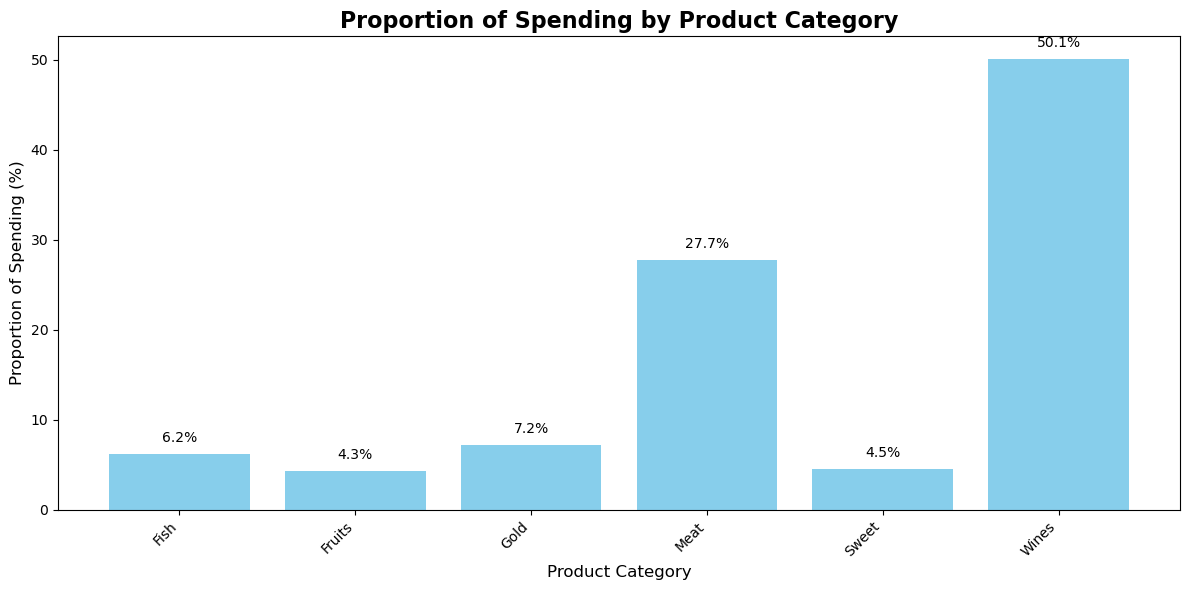

In [226]:
# Mengubah DataFrame ke format panjang
df_melted = df_product.melt(id_vars=['RFM_Specification'], 
                            value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], 
                            var_name='Product', 
                            value_name='Spending')

# Menghitung total pengeluaran untuk setiap kategori produk
total_spending = df_melted.groupby('Product')['Spending'].sum()

# Menghitung total pengeluaran keseluruhan
total_spending_all = total_spending.sum()

# Menghitung proporsi pengeluaran untuk setiap kategori produk
proportions = (total_spending / total_spending_all) * 100

# Menentukan label sumbu x 
x_labels = ['Fish', 'Fruits', 'Gold', 'Meat', 'Sweet', 'Wines']

# Membuat plot bar untuk proporsi
plt.figure(figsize=(12, 6))
plt.bar(x_labels, proportions, color='skyblue')

# Menambahkan judul dan label
plt.title('Proportion of Spending by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Proportion of Spending (%)', fontsize=12)

# Menambahkan label persentase pada setiap bar
for i, value in enumerate(proportions):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', color='black')

# Menampilkan plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

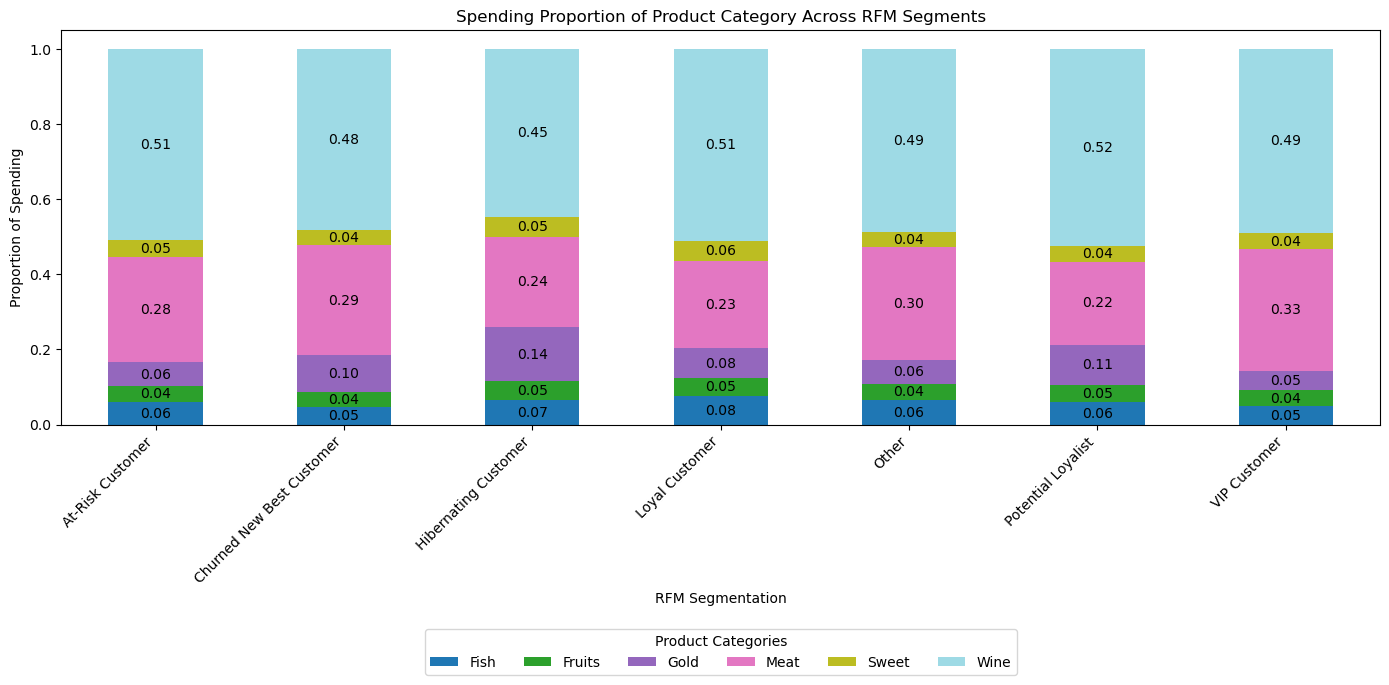

In [227]:
# Mengubah DataFrame ke format panjang
df_melted = df_product.melt(id_vars=['RFM_Specification'], 
                            value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], 
                            var_name='Product', 
                            value_name='Spending')

# Menghitung total pengeluaran per segmen 
total_spending_per_segment = df_melted.groupby('RFM_Specification')['Spending'].sum()

# Menghitung proporsi pengeluaran per produk dalam setiap segmen
df_melted['Proportion'] = df_melted.apply(lambda x: x['Spending'] / total_spending_per_segment[x['RFM_Specification']], axis=1)

# Mengelompokkan data berdasarkan RFM_Specification dan Product untuk plotting
grouped = df_melted.groupby(['RFM_Specification', 'Product'])['Proportion'].sum().unstack().fillna(0)

# Membuat stacked bar plot
fig, ax = plt.subplots(figsize=(14, 12))

# Memplot setiap kategori produk dengan warna yang berbeda
grouped.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# Menambahkan label dan judul
ax.set_xlabel('RFM Segmentation')
ax.set_ylabel('Proportion of Spending')
ax.set_title('Spending Proportion of Product Category Across RFM Segments')
ax.set_xticklabels(grouped.index, rotation=45, ha='right')

# Menambahkan label persentase pada batang
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.2f')

# Menambahkan legenda di bagian bawah
ax.legend(title='Product Categories', labels=['Fish', 'Fruits', 'Gold', 'Meat', 'Sweet', 'Wine'], bbox_to_anchor=(0.5, -0.5), loc='upper center', ncol=len(grouped.columns))


# Menyesuaikan layout
plt.tight_layout(rect=[0, 0.2, 1, 1])

plt.show()

Pada data ini, jumlah transaksi dalam jumlah barang (kuantitas) setiap kategori produk tidak dapat ditentukan secara spesifik, dimana hal ini sebenarnya akan mempengaruhi analisis ketertarikan pembelian produk untuk setiap segmen customer. Maka hanya akan dianalisis pada total spending customer untuk kategori produk tertentu walaupun dengan catatan hal ini bisa menjadi tidak akurat dikarenakan data dipengaruhi harga total barang yang bisa menjadi bias jika harga sebuah produk beda jauh dengan harga produk lainnya. 

Analisis ini dapat menjadi lebih akurat jika terdapat data profit atau kuantitas barang pada setiap transaksi pada kategori produk tertentu.

Dari kedua grafik diatas, maka pertanyaan dapat dijawab:

1. Dari 6 kategori produk yang dijual, kategori produk manakah yang nilai penjualannya paling tinggi?

    Kategori produk yang paling banyak berkontribusi untuk total penjualan adalah produk wine dan daging, yaitu wine 50.1% dan daging 27.7% dari total penjualan. 
    Namun, dibutuhkan data lebih jika ingin mengetahui lebih spesifik apakah wine mempunyai profit terbesar dengan jumlah penjualan yang paling besar. 

2. Apakah setiap segmentasi customer mempunyai ketertarikan khusus pada kategori produk tertentu? 

    Dilihat dari grafik kedua, terlihat proporsi produk wine dan daging pada setiap segmen customer adalah yang paling mendominasi. Sedangkan kategori lainnya mempunyai proporsi yang hampir sama pada setiap segmen. Hasil ini sama seperti pada grafik pertama, dimana proporsi pada grafik adalah untuk seluruh customer dan tidak di segmentasi. 

    Untuk hal ini, diperlukan data yang lebih lengkap untuk menentukan apakah betul semua segmen customer mempunyai urutan ketertarikan yang sama pada kategori produk. 

## Karakteristik Segmentasi Customer dengan Platform Transaksi

Pada bagian ini, akan dilihat hubungan antara segmentasi customer yang sudah didefinisikan dengan RFM dibandingkan dengan platform transaksi yang digunakan. Analaisis perbandingan ini akan menjawab pertanyaan berikut:

1. Dari 3 platform untuk transaksi, platform manakah yang lebih banyak digunakan oleh customer?
2. Pada segmentasi customer, apakah ada segmen yang mempunyai ketertarikan khusus pada platform transaksi tertentu? 

Pertama, akan dibuat dataframe yang dibutuhkan untuk melihat perbandingan tersebut:

In [228]:
df_platform = pd.merge(df[['ID','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']],df_RFM[['ID','RFM_Tier','RFM_Specification']], on='ID',how='inner')
df_platform.head()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,RFM_Tier,RFM_Specification
0,11004,1,0,2,Middle Tier,Other
1,1150,4,6,4,High Tier,Other
2,7829,2,1,2,Low Tier,Hibernating Customer
3,6663,3,1,4,Low Tier,Hibernating Customer
4,6932,7,10,5,High Tier,At-Risk Customer


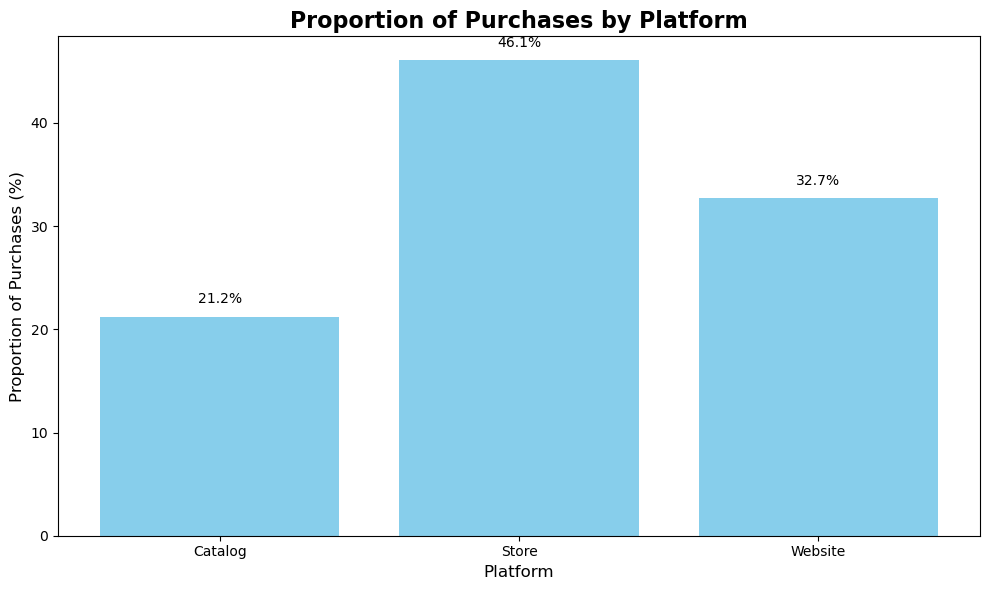

In [229]:
# Mengubah DataFrame ke format panjang
df_melted = df_platform.melt(id_vars=['RFM_Specification'], 
                             value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], 
                             var_name='Platform', 
                             value_name='Purchases')

# Menghitung total pembelian per platform
total_purchases_per_platform = df_melted.groupby('Platform')['Purchases'].sum()

# Menghitung total pembelian untuk normalisasi
total_purchases_all = total_purchases_per_platform.sum()

# Menghitung proporsi pembelian untuk setiap platform
proportions = (total_purchases_per_platform / total_purchases_all) * 100

# Menyiapkan plot
plt.figure(figsize=(10, 6))
bars = plt.bar(proportions.index, proportions, color='skyblue')

# Menambahkan judul dan label
plt.title('Proportion of Purchases by Platform', fontsize=16, fontweight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Proportion of Purchases (%)', fontsize=12)

# Menambahkan label persentase pada setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom', color='black')

# Mengganti label x-axis dengan nama-nama platform
plt.xticks(ticks=range(len(proportions.index)), labels=['Catalog', 'Store','Website'])

# Menampilkan plot
plt.tight_layout()
plt.show()

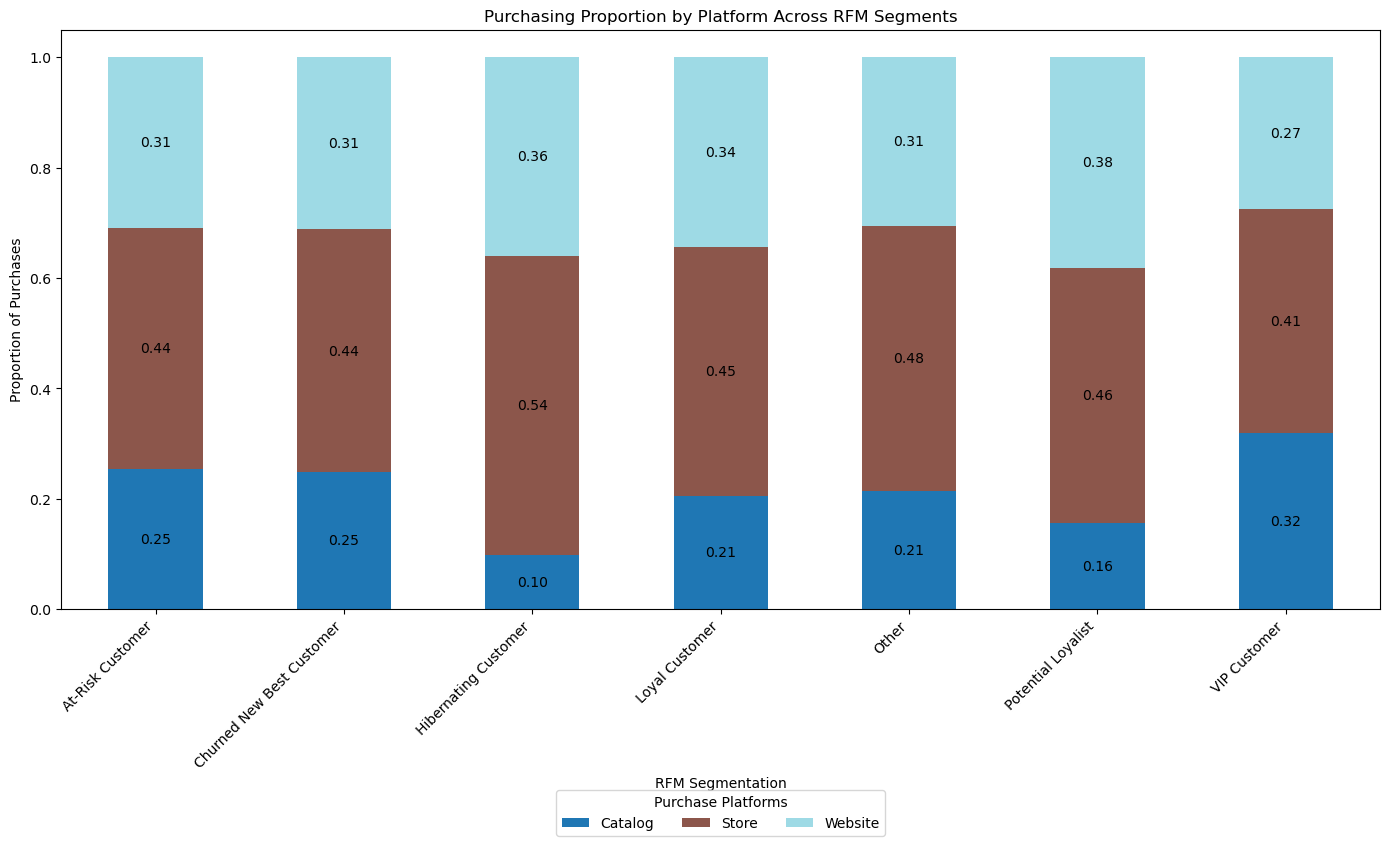

In [230]:
# Mengubah DataFrame ke format panjang
df_melted = df_platform.melt(id_vars=['RFM_Specification'], 
                             value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], 
                             var_name='Platform', 
                             value_name='Purchases')

# Menghitung total pembelian per segmen untuk normalisasi
total_purchases_per_segment = df_melted.groupby('RFM_Specification')['Purchases'].sum()

# Menghitung proporsi pembelian per platform dalam setiap segmen
df_melted['Proportion'] = df_melted.apply(lambda x: x['Purchases'] / total_purchases_per_segment[x['RFM_Specification']], axis=1)

# Mengelompokkan berdasarkan RFM_Specification dan Platform untuk plotting
grouped = df_melted.groupby(['RFM_Specification', 'Platform'])['Proportion'].sum().unstack().fillna(0)

# Membuat bar plot bertumpuk
fig, ax = plt.subplots(figsize=(14, 12))

# Plot setiap kategori platform dengan warna yang berbeda
grouped.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# Menambahkan label dan judul
ax.set_xlabel('RFM Segmentation')
ax.set_ylabel('Proportion of Purchases')
ax.set_title('Purchasing Proportion by Platform Across RFM Segments')
ax.set_xticklabels(grouped.index, rotation=45, ha='right')

# Menambahkan label persentase pada bar
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.2f')

# Menambahkan legenda di bawah
ax.legend(title='Purchase Platforms', labels=['Catalog', 'Store','Website'],bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=3)

# Menyesuaikan layout
plt.tight_layout(rect=[0, 0.2, 1, 1])

plt.show()

Dari kedua grafik diatas, dapat dijawab pertanyaan berikut:

1. Dari 3 platform untuk transaksi, platorm manakah yang lebih banyak digunakan oleh customer?

    Secara keseluruhan, 46.1% customer lebih banyak berbelanja di toko (store)

2. Pada segmentasi customer, apakah ada segmen yang mempunyai ketertarikan khusus pada platform transaksi tertentu? 

    Setiap segmen memiliki persentase kategori platform berbelanja dengan urutan dari yang tebesar yaitu toko (store), kemudian melewati website dan yang terakhir adalah dengan katalog. Hasil ini menunjukkan preferensi platform berbelanja setiap segmen sama.



In [231]:
# Uji normalitas

from scipy.stats import normaltest

# Daftar platform yang akan diuji
platforms = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

for platform in platforms:
    stat, pvalue = normaltest(df_platform[platform])

    alpha = 0.05

    if pvalue > alpha:
        print(f'{platform} -> pvalue = {pvalue:.5f}. pvalue > {alpha} maka Fail to Reject Ho. Kita mengasumsikan bahwa data terdistribusi normal')
    else:
        print(f'{platform} -> pvalue = {pvalue:.5f}. pvalue <= {alpha} maka Reject Ho. Kita mengasumsikan bahwa data TIDAK terdistribusi normal')

NumWebPurchases -> pvalue = 0.00000. pvalue <= 0.05 maka Reject Ho. Kita mengasumsikan bahwa data TIDAK terdistribusi normal
NumCatalogPurchases -> pvalue = 0.00000. pvalue <= 0.05 maka Reject Ho. Kita mengasumsikan bahwa data TIDAK terdistribusi normal
NumStorePurchases -> pvalue = 0.00000. pvalue <= 0.05 maka Reject Ho. Kita mengasumsikan bahwa data TIDAK terdistribusi normal


In [232]:
# Uji Hipotesis untuk data tidak terdistribusi normal

from scipy.stats import kruskal

# Daftar segmen RFM
rfm_segments = df_platform['RFM_Specification'].unique()

# Dictionary untuk menyimpan hasil
results = {}

# Iterasi untuk setiap segmen RFM
for segment in rfm_segments:
    print(f'\nUji Kruskal-Wallis H untuk segmen {segment}:')
    
    # Ambil data untuk segmen RFM tertentu
    segment_data = df_platform[df_platform['RFM_Specification'] == segment]
    
    # Ambil nilai transaksi untuk setiap platform dalam segmen ini
    data = [segment_data[platform].dropna() for platform in platforms]
    
    # Lakukan uji Kruskal-Wallis H 
    
    h_stat, p_val = kruskal(*data)
        
    # Simpan hasil
    results[segment] = {
        'H-statistic': h_stat,
        'p-value': p_val
        }
        
    print(f'H-statistic = {h_stat}, p-value = {p_val}')



Uji Kruskal-Wallis H untuk segmen Other:
H-statistic = 318.34311770908766, p-value = 7.458823209371944e-70

Uji Kruskal-Wallis H untuk segmen Hibernating Customer:
H-statistic = 836.1471897813949, p-value = 2.7098466165177177e-182

Uji Kruskal-Wallis H untuk segmen At-Risk Customer:
H-statistic = 350.64221963749935, p-value = 7.227855217829228e-77

Uji Kruskal-Wallis H untuk segmen Potential Loyalist:
H-statistic = 485.6912447389739, p-value = 3.415751365089164e-106

Uji Kruskal-Wallis H untuk segmen Loyal Customer:
H-statistic = 133.2076896455236, p-value = 1.1866365469209581e-29

Uji Kruskal-Wallis H untuk segmen VIP Customer:
H-statistic = 38.8050928086753, p-value = 3.746115485666519e-09

Uji Kruskal-Wallis H untuk segmen Churned New Best Customer:
H-statistic = 22.209290178876188, p-value = 1.5042288510161468e-05


Untuk pertanyaan kedua, dilakukan juga uji statistik Kruskal Wallis (data tidak terdistribusi normal) untuk dapat melihat apakah pada setiap segmen customer, terdapat perbedaan signifikan untuk platform transaksi yang paling sering digunakan. Dari hasil yang didapatkan, semua segmen menghasilkan p-value dibawah 0,05.

Maka, data menunjukkan adanya perbedaan signifikan antara platform di segmen tersebut dan bisa diasumsikan bahwa preferensi transaksi melalui toko (store) adalah yang paling tinggi untuk setiap segmen.

Selain dari segmentasi RFM yang sudah didefinisikan, dapat dilihat juga bahwa jika dibandingkan dengan segmentasi sesuai umur, jumlah transaksi melalui toko juga adalah yang paling tinggi untuk setiap segmen umur.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8936\3541780555.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_transactions = df_platform_age.groupby('Age_Group').agg({


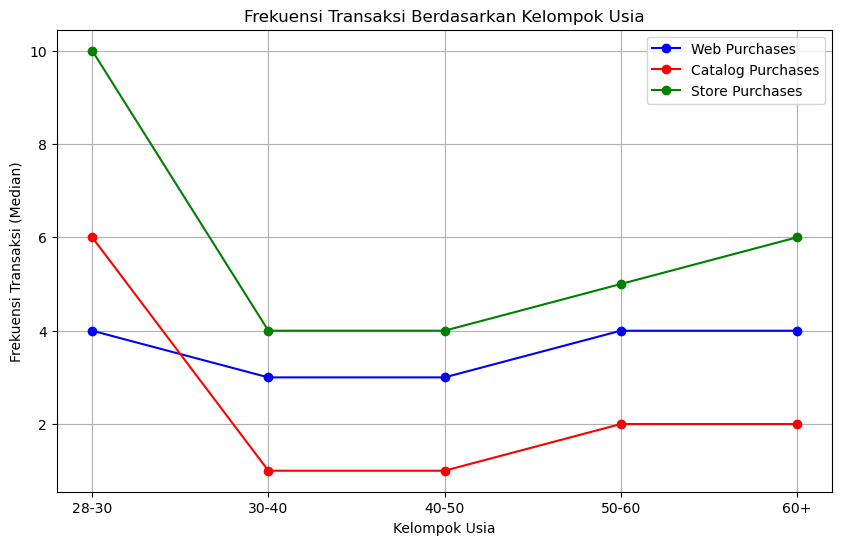

In [233]:
df_platform_age = pd.merge(df[['ID','Customer_Age','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']],df_RFM[['ID','RFM_Tier','RFM_Specification']], on='ID',how='inner')

# Definisikan rentang usia dan labelnya
age_bins = [28, 30, 40, 50, 60, 100]
age_labels = ['28-30', '30-40', '40-50', '50-60', '60+']

# Tambahkan kolom kelompok usia
df_platform_age['Age_Group'] = pd.cut(df_platform_age['Customer_Age'], bins=age_bins, labels=age_labels)

# Hitung rata-rata frekuensi transaksi per kelompok usia
average_transactions = df_platform_age.groupby('Age_Group').agg({
    'NumWebPurchases': 'median',
    'NumCatalogPurchases': 'median',
    'NumStorePurchases': 'median'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot masing-masing garis
plt.plot(average_transactions['Age_Group'], average_transactions['NumWebPurchases'], marker='o', label='Web Purchases', color='blue')
plt.plot(average_transactions['Age_Group'], average_transactions['NumCatalogPurchases'], marker='o', label='Catalog Purchases', color='red')
plt.plot(average_transactions['Age_Group'], average_transactions['NumStorePurchases'], marker='o', label='Store Purchases', color='green')

# Tambahkan label dan judul
plt.xlabel('Kelompok Usia')
plt.ylabel('Frekuensi Transaksi (Median)')
plt.title('Frekuensi Transaksi Berdasarkan Kelompok Usia')
plt.legend()

# Tampilkan plot
plt.grid(True)
plt.show()

## Hubungan Total Spending dengan Marital Status dan Jumlah Anak

Pada bagian ini, akan dilihat hubungan antara total spending dari customer dengan marital status dan jumlah anak nya. Analaisis perbandingan ini akan menjawab pertanyaan berikut:

1. Kategori marital status customer manakah yang jumlah pembelian di supermarket paling tinggi?
2. Apakah customer yang mempunyai anak pada keluarga memberikan pengaruh signifikan pada jumlah pembelian? 

Pertama, akan dibuat dataframe dan grafik yang dibutuhkan untuk melihat perbandingan tersebut:

In [234]:
df_marital_kids = pd.merge(df[['ID','Marital_Status','Total_Children']],df_RFM[['ID','Monetary']], on='ID',how='inner')
df_marital_kids.head()

,ID,Marital_Status,Total_Children,Monetary
0,11004,Single,1,22
1,1150,Married,0,1853
2,7829,Divorced,1,65
3,6663,Single,0,157
4,6932,Married,0,2119


In [235]:
df_marital_kids.groupby(['Marital_Status']).agg({
    'ID': pd.Series.nunique,
    'Monetary':'sum'})

,ID,Monetary
Marital_Status,,
Divorced,213,129524
Married,1305,781805
Single,445,267577
Widow,70,52886


In [236]:
df_marital_kids.groupby(['Total_Children']).agg({
    'ID': pd.Series.nunique,
    'Monetary':'sum'})

,ID,Monetary
Total_Children,,
0,572,639134
1,1034,485452
2,379,93790
3,48,13416


Untuk menjawab pertanyaan kedua yaitu apakah ada pengaruh signifikan memiliki anak terhadap jumlah pembelian, maka akan dilakukan uji statistik Mann-Whitney. Dari hasil uji ini, didapatkan p-value kurang dari 0,05 dan ada perbedaan yang signifikan dalam jumlah pembelian antara mereka yang memiliki anak dan yang tidak.

In [237]:
from scipy.stats import mannwhitneyu

# Memisahkan data menjadi dua kelompok: memiliki anak dan tidak memiliki anak
group_with_kids = df_marital_kids[df_marital_kids['Total_Children'] > 0]['Monetary']
group_without_kids = df_marital_kids[df_marital_kids['Total_Children'] == 0]['Monetary']

# Melakukan uji Mann-Whitney U
stat, p_value = mannwhitneyu(group_with_kids, group_without_kids)

print(f'H-statistic: {stat}')
print(f'p-value: {p_value}')

# Interpretasi hasil
if p_value < 0.05:
    print("Ada perbedaan yang signifikan dalam jumlah pembelian antara mereka yang memiliki anak dan yang tidak.")
else:
    print("Tidak ada perbedaan yang signifikan dalam jumlah pembelian antara mereka yang memiliki anak dan yang tidak.")

H-statistic: 164656.5
p-value: 1.9990335781308985e-100
Ada perbedaan yang signifikan dalam jumlah pembelian antara mereka yang memiliki anak dan yang tidak.


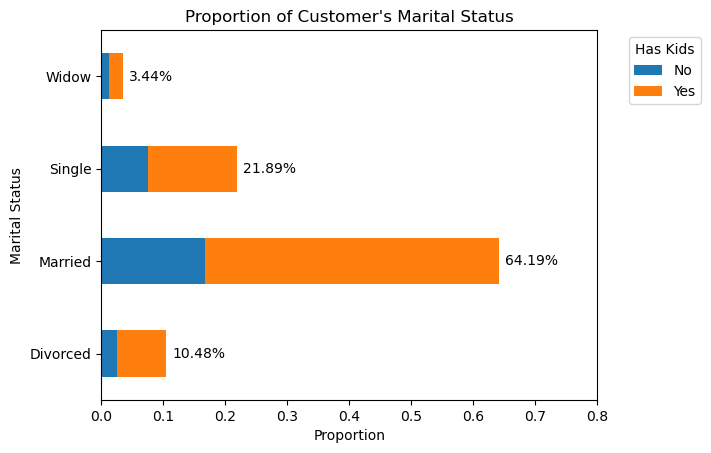

In [238]:
# Buat kolom baru 'Has_Kids' berdasarkan kolom 'Total_Children'
df_marital_kids['Has_Kids'] = df_marital_kids['Total_Children'] > 0

# Hitung proporsi status pernikahan dan apakah ada anak
proportion = df_marital_kids.groupby(['Marital_Status', 'Has_Kids']).size() / len(df_marital_kids)

# Ubah series menjadi DataFrame agar lebih mudah dibaca
proportion_df = proportion.reset_index(name='Proportion')

# Buat plot batang horizontal
ax = proportion_df.pivot(index='Marital_Status', columns='Has_Kids', values='Proportion').plot(kind='barh', stacked=True)

# Tambahkan label dan judul
plt.ylabel('Marital Status')
plt.xlabel('Proportion')
plt.title("Proportion of Customer's Marital Status")

# Hitung dan tambahkan label persentase total untuk setiap segmen status pernikahan
total_proportions = proportion_df.groupby('Marital_Status')['Proportion'].sum()

# Loop melalui setiap batang dan tambahkan label persentase total
for i, (index, value) in enumerate(total_proportions.items()):
    ax.text(value + 0.01, i, f'{value*100:.2f}%', va='center')

# Atur batas sumbu x menjadi 0,8
plt.xlim(0, 0.8)

# Hapus legenda jika hanya ingin menampilkan persentase keseluruhan
plt.legend(title='Has Kids', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan plot
plt.show()

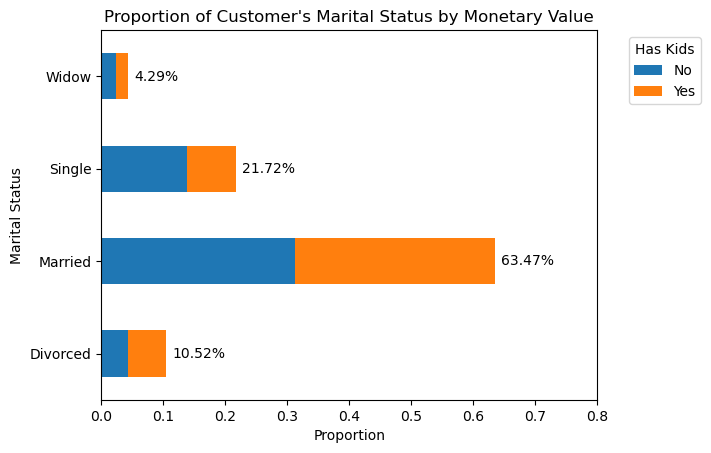

In [239]:
# Buat kolom baru 'Has_Kids' berdasarkan kolom 'Total_Children'
df_marital_kids['Has_Kids'] = df_marital_kids['Total_Children'] > 0

# Hitung total monetary untuk setiap kombinasi Marital_Status dan Has_Kids
monetary_sum = df_marital_kids.groupby(['Marital_Status', 'Has_Kids'])['Monetary'].sum()

# Hitung proporsi dengan membagi total monetary per grup dengan total monetary keseluruhan
total_monetary = df_marital_kids['Monetary'].sum()
proportion = monetary_sum / total_monetary

# Konversi series menjadi DataFrame untuk kemudahan membaca
proportion_df = proportion.reset_index(name='Proportion')

# Buat plot batang horizontal
ax = proportion_df.pivot(index='Marital_Status', columns='Has_Kids', values='Proportion').plot(kind='barh', stacked=True)

# Tambahkan label dan judul
plt.ylabel('Marital Status')
plt.xlabel('Proportion')
plt.title("Proportion of Customer's Marital Status by Monetary Value")

# Tambahkan label persentase total untuk setiap segmen status perkawinan
total_proportions = proportion_df.groupby('Marital_Status')['Proportion'].sum()

# Loop melalui setiap bar dan tambahkan label persentase total
for i, (index, value) in enumerate(total_proportions.items()):
    ax.text(value + 0.01, i, f'{value*100:.2f}%', va='center')

# Atur batas x-axis ke 80%
plt.xlim(0, 0.8)

# Ubah legenda menjadi 'No' dan 'Yes'
plt.legend(title='Has Kids', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan plot
plt.show()

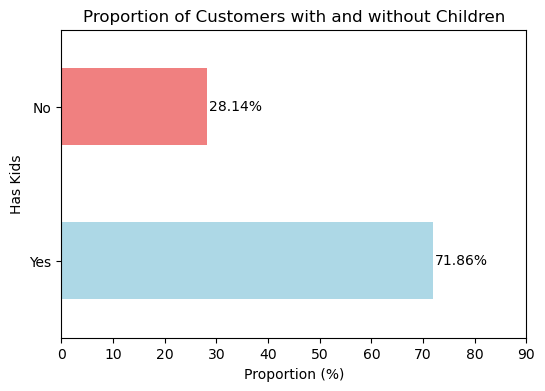

In [240]:
# Menghitung proporsi customer yang memiliki dan tidak memiliki anak
kids_proportion = df_marital_kids['Has_Kids'].value_counts(normalize=True) * 100

# Mengubah True/False menjadi Yes/No untuk label sumbu y
kids_proportion.index = kids_proportion.index.map({True: 'Yes', False: 'No'})

# Membuat plot batang horizontal dengan ukuran figure yang lebih lebar
plt.figure(figsize=(6, 4))  
ax = kids_proportion.plot(kind='barh', color=['lightblue', 'lightcoral'])

# Menambahkan label dan judul
plt.xlabel('Proportion (%)')
plt.ylabel('Has Kids')
plt.title('Proportion of Customers with and without Children')

# Menambahkan label persentase pada bar
for index, value in enumerate(kids_proportion):
    ax.text(value + 0.5, index, f'{value:.2f}%', va='center')

# Mengatur batas sumbu x hingga 80
plt.xlim(0, 90)

plt.show()

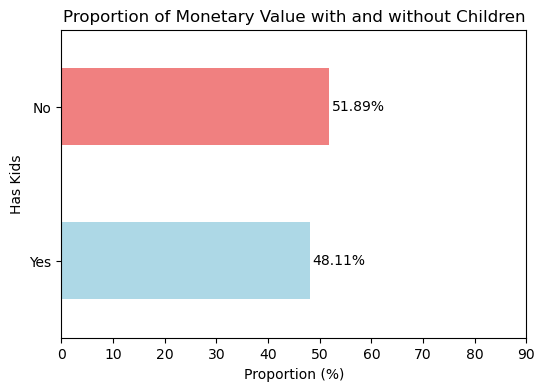

In [241]:
# Tambahkan kolom 'Has_Kids' berdasarkan kolom 'Total_Children'
df_marital_kids['Has_Kids'] = df_marital_kids['Total_Children'] > 0

# Hitung total monetary untuk pelanggan dengan dan tanpa anak
monetary_sum = df_marital_kids.groupby('Has_Kids')['Monetary'].sum()

# Hitung proporsi monetary
total_monetary = monetary_sum.sum()
kids_proportion_monetary = (monetary_sum / total_monetary) * 100

# Map True/False ke Yes/No untuk label sumbu y
kids_proportion_monetary.index = kids_proportion_monetary.index.map({True: 'Yes', False: 'No'})

# Urutkan hasil sehingga 'No' muncul setelah 'Yes'
kids_proportion_monetary = kids_proportion_monetary.reindex(['Yes', 'No'])

# Buat plot bar horizontal dengan ukuran figur yang lebih lebar
plt.figure(figsize=(6, 4))  # Tingkatkan lebar figur
ax = kids_proportion_monetary.plot(kind='barh', color=['lightblue', 'lightcoral'])

# Tambahkan label dan judul
plt.xlabel('Proportion (%)')
plt.ylabel('Has Kids')
plt.title('Proportion of Monetary Value with and without Children')

# Tambahkan label persentase pada bar
for index, value in enumerate(kids_proportion_monetary):
    ax.text(value + 0.5, index, f'{value:.2f}%', va='center')

# Setel batas x-axis ke 90
plt.xlim(0, 90)

plt.show()

Dari 4 grafik diatas, dapat dijawab pertanyaan berikut:

1. Kategori marital status customer manakah yang jumlah pembelian di supermarket paling tinggi?

    Marital Status customer secara jumlah customer ataupun jumlah monetary paling tinggi adalah status married atau sudah menikah yaitu 64% dari total customer dan 63% dari jumlah spending customer.

2. Apakah customer yang mempunyai anak pada keluarga memberikan pengaruh signifikan pada jumlah pembelian? 

    Dengan uji statistik dibuktikan bahwa terdapat pengaruh signifikan customer yang mempunyai anak dan tidak terhadap jumlah pembelian customer. Dari grafik, didapatkan bahwa jumlah customer yang mempunyai anak jauh lebih besar yaitu 72% dari total customer, tetapi customer yang tidak mempunyai anak memiliki nilai monetary sedikit lebih tinggi dari yang mempunyai anak yaitu 52% dari totalnya. 

## **Kesimpulan dan Rekomendasi**

Dari analisis yang telah dilakukan, dapat dibuat kesimpulan sebagai berikut:

1. Dari setiap campaign yang dilakukan, secara keseluruhan partisipasi customer masih dibawah 10% dan partisipasi customer pada campaign yang paling kecil adalah campaign kedua yaitu hanya 1,3%. Campaign kedua ini juga mempunyai proporsi partisipasi terdendah hampir di seluruh segmentasi customer.

2. Kategori produk yang paling banyak berkontribusi untuk total penjualan adalah produk wine dan daging, yaitu wine 50.1% dan daging 27.7% dari total penjualan. Namun, dibutuhkan data lebih lengkap seperti kuantitas barang dalam transaksi atau profit jika ingin mengetahui lebih spesifik apakah wine mempunyai profit terbesar dengan total penjualan yang paling besar.

    Kategori produk dengan total penjualan yang tertinggi pertama dan kedua untuk setiap segmentasi spesifik analisis RFM adalan wine dan daging. 

3. Secara keseluruhan, 46.1% customer lebih banyak berbelanja di toko (store) dibandingkan dengan 2 kategori lainnya yaitu website dan catalog. Hal ini juga terjadi pada setiap segmentasi spesifik RFM dan segmentasi sesuai umur customer dimana setiap segmentasi customer lebih memilih untuk berbelanja di toko (store).

4. Marital Status customer secara jumlah customer ataupun jumlah monetary paling tinggi adalah status married atau sudah menikah yaitu 64% dari total customer dan 63% dari jumlah spending customer.

    Kemudian, jumlah customer yang mempunyai anak jauh lebih besar dibandingkan dengan yang tidak punya anak, yaitu 72% dari total customer. Tetapi, customer yang tidak mempunyai anak memiliki nilai monetary sedikit lebih tinggi dari yang mempunyai anak yaitu 52% dari total penjualan

Pada analisis RFM, customer dibagi menjadi 6 segmentasi spesifik dan sifat khususnya pada campaign tertentu adalah:
1. VIP Customer: Segmen customer ini lebih tertarik pada campaign kelima.

2. Loyal Customer: Segmen customer ini lebih tertarik pada campaign keempat.

3. Potential Loyalist: Segmen customer ini lebih tertarik pada campaign ketiga dan keempat.

4. At-Risk Customer: Segmen customer ini mempunyai ketertarikan yang mirip pada campaign 1,4 dan 5.

5. Churned New Best Customer: Segmen customer ini tidak mempunyai banyak data sehingga tidak dapat dibuktikan apakah ada ketertarikan signifikan terhadap campaign tertentu.

6. Hibernating Customer: Segmen customer ini hanya pernah berpartisipasi pada campaign 3 dan 4, lebih banyak di campaign 3. 

### **Rekomendasi**

Berdasarkan analisis karakteristik dan segmentasi customer yang telah dilakukan, berikut adalah beberapa rekomendasi untuk meningkatkan kinerja marketing dan penjualan:

1. Optimalkan Campaign Marketing:
    - Mengingat partisipasi customer pada campaign kedua sangat rendah (hanya 1,3%), disarankan untuk mengkaji ulang strategi campaign ini. Analisis dapat dilakukan untuk memahami mengapa campaign ini tidak menarik bagi customer, seperti mengevaluasi penawaran yang diberikan, saluran komunikasi yang digunakan, atau waktu pelaksanaan campaign.
    - Targetkan Campaign Berdasarkan Segmentasi RFM. Dengan mengetahui bahwa segmen-segmen tertentu lebih tertarik pada campaign tertentu, marketing dapat disesuaikan untuk lebih fokus pada segmen tersebut. Misalnya, VIP customer dapat ditargetkan lebih agresif pada campaign kelima, sementara Loyal customer pada campaign keempat. Pendekatan ini dapat meningkatkan efektivitas kampanye dan partisipasi customer.
    -  Mengingat keterbatasan data untuk segmen Churned New Best Customer, diperlukan upaya tambahan untuk mengumpulkan lebih banyak informasi tentang perilaku mereka. Ini bisa mencakup survei atau analisis perilaku belanja sebelumnya untuk mengidentifikasi cara terbaik menarik mereka kembali ke kampanye aktif.

2. Fokus pada Produk Utama dengan Analisis Lebih Mendalam:
    - Optimalkan Penjualan Wine dan Daging: Mengingat produk wine dan daging berkontribusi besar terhadap penjualan, fokuskan strategi promosi dan kampanye pada dua produk ini. Selain itu, lakukan analisis tambahan untuk mengevaluasi profitabilitas dari kedua produk ini agar strategi penjualan bisa lebih tepat sasaran.
    - Jika data tambahan tersedia, seperti kuantitas dan margin profit per produk, perusahaan dapat mengidentifikasi produk lain yang mungkin memberikan profit lebih tinggi dan melakukan kampanye khusus untuk meningkatkan penjualannya.

3. Optimalkan Pengalaman Berbelanja di Toko (Store):
    - Mengingat 46.1% customer lebih suka berbelanja di toko, disarankan untuk memperkuat pengalaman belanja offline. Ini bisa mencakup program loyalitas khusus untuk pembelian di toko, peningkatan pelayanan, atau promosi eksklusif yang hanya tersedia di toko fisik.
    - Meskipun preferensi belanja lebih condong ke toko, penting untuk tetap mendukung belanja online dengan promosi cross-channel yang mengarahkan customer dari platform online ke toko fisik, dan sebaliknya.

4. Perkuat Segmentasi Berdasarkan Status Pernikahan dan Kehadiran Anak:
    - Dengan 63-65% customer berstatus menikah, pertimbangkan untuk mengembangkan penawaran khusus atau program loyalitas yang sesuai dengan kebutuhan keluarga.
    - Karena customer dengan anak mendominasi dalam jumlah tetapi customer tanpa anak memiliki nilai monetary lebih tinggi, pertimbangkan untuk mengembangkan strategi yang melibatkan penawaran eksklusif yang dapat menarik kedua kelompok ini secara berbeda.

Selain itu, berikut adalah rekomendasi untuk treatment khusus berdasarkan segmentasi RFM:

1. Hibernating Customer
    
    Karakteristik: Customer dengan nilai keseluruhan RFM paling rendah, yaitu rendah dalam hal recency, frequency, dan monetary.
    
    Rekomendasi:
    - Re-engagement Campaigns: Kirimkan penawaran menarik atau kampanye eksklusif untuk menarik kembali minat mereka.
    - Discounts & Promotions: Tawarkan diskon besar atau promosi yang mengarahkan mereka untuk melakukan pembelian pertama kembali.
    - Personalized Outreach: Kirimkan email yang dipersonalisasi dengan konten yang relevan berdasarkan riwayat pembelian terakhir mereka.

2. Churned New Best Customer
    
    Karakteristik: Customer yang sudah lama tidak melakukan transaksi, memiliki frekuensi/jumlah transaksi rendah namun dengan nilai monetary yang tinggi.
    
    Rekomendasi:
    - Win-Back Campaigns: Kirimkan kampanye yang menonjolkan produk-produk premium atau layanan eksklusif yang pernah mereka beli.
    - Exclusive Offers: Berikan penawaran eksklusif atau program loyalitas yang menekankan penghargaan atas nilai tinggi yang pernah mereka bawa.
    - Feedback Solicitation: Tanyakan kepada mereka mengapa mereka berhenti membeli dan bagaimana perusahaan dapat meningkatkan layanan.

3. At-Risk Customer
    
    Karakteristik: Customer yang sebelumnya loyal dengan transaksi dan nilai monetary besar, namun sudah lama tidak bertransaksi (recency rendah).
    
    Rekomendasi:
    - Urgency-Driven Campaigns: Buat kampanye yang menekankan urgensi seperti penawaran terbatas waktu untuk mendorong mereka kembali bertransaksi.
    - Personalized Offers: Sesuaikan penawaran dengan preferensi pembelian sebelumnya untuk menarik kembali minat mereka.
    - Reinforce Value Proposition: Ingatkan mereka akan nilai unik yang ditawarkan oleh produk atau layanan yang pernah mereka nikmati.

4. Potential Loyalist

    Karakteristik: Customer dengan potensi menjadi loyal, memiliki recency tinggi namun frequency dan monetary berada pada nilai median.

    Rekomendasi:
    - Loyalty Program Enrollment: Ajak mereka bergabung dalam program loyalitas untuk meningkatkan keterlibatan.
    - Incentivize Repeat Purchases: Berikan insentif untuk pembelian berulang agar mereka semakin sering bertransaksi.
    - Targeted Upselling: Tawarkan produk atau layanan tambahan yang relevan untuk meningkatkan nilai transaksi mereka.

5. Loyal Customer
    
    Karakteristik: Customer loyal dengan recency dan frequency tinggi, namun nilai monetary di bawah VIP.
    
    Rekomendasi:
    - Exclusive Member Benefits: Berikan keuntungan eksklusif seperti akses awal ke produk baru atau undangan ke event spesial.
    - Cross-Selling Opportunities: Tawarkan produk pelengkap untuk meningkatkan nilai transaksi mereka.
    - Sustain Engagement: Teruskan komunikasi secara rutin dengan konten yang dipersonalisasi untuk mempertahankan loyalitas mereka.

6. VIP Customer
    
    Karakteristik: Customer loyal dengan nilai recency, frequency, dan monetary tertinggi.
    
    Rekomendasi:
    - Personalized Concierge Services: Sediakan layanan concierge khusus untuk mereka yang menawarkan pengalaman belanja yang dipersonalisasi.
    - Exclusive VIP Events: Undang mereka ke acara eksklusif atau pertemuan VIP untuk memperkuat hubungan.
    - Reward High Spend: Berikan hadiah atau penghargaan khusus untuk pengeluaran mereka yang tinggi, seperti kredit belanja atau produk gratis.

Dengan mempersempit target marketing pada segmen tertentu dan melakukan treatment khusus pada segmen spesifik customer, diharapkan analisis ini bisa membantu perusahaan untuk mengurangi biaya pada marketing dan meningkatkan aktivitas customer dalam transaksi di supermarket sehingga akan berdampak pada kenaikan sales dan profit perusahaan.

In [242]:
# Membuat data yang sudah dibersihkan menadi format csv kembali untuk selanjutnya dibuat dashboard pada tableau

df_last = pd.merge(df,df_RFM[['ID','RFM_Tier','RFM_Specification','Recency','Frequency','Monetary','R_score','F_score','M_score','RFM_score']], on='ID', how='inner')
df_last.to_csv('Supermarket Customers-Cleaned.csv')